In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-datasets/artists.csv
/kaggle/input/spotify-datasets/tracks.csv


# Exploring dataset

## Importing libraries

In [2]:
import datetime
from wordcloud import WordCloud

from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pygo
import seaborn as sns

from inspect import Signature, signature, Parameter


import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer , make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import datasets, set_config
from scipy import stats

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, MeanShift, SpectralClustering
from sklearn.metrics import adjusted_rand_score

from xgboost import XGBRegressor, XGBClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [3]:
# loading the dataset
df = pd.read_csv('/kaggle/input/spotify-datasets/tracks.csv', header = 0)
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
df.shape

(586672, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

* id and id_artist looks like uniquely generated, can be removed from analysis
* release_date is inconsistent , need to be formated
* duration_ms have very large values comapred to others
* loudness has -ve values

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


## Check the Distribution

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'explicit'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

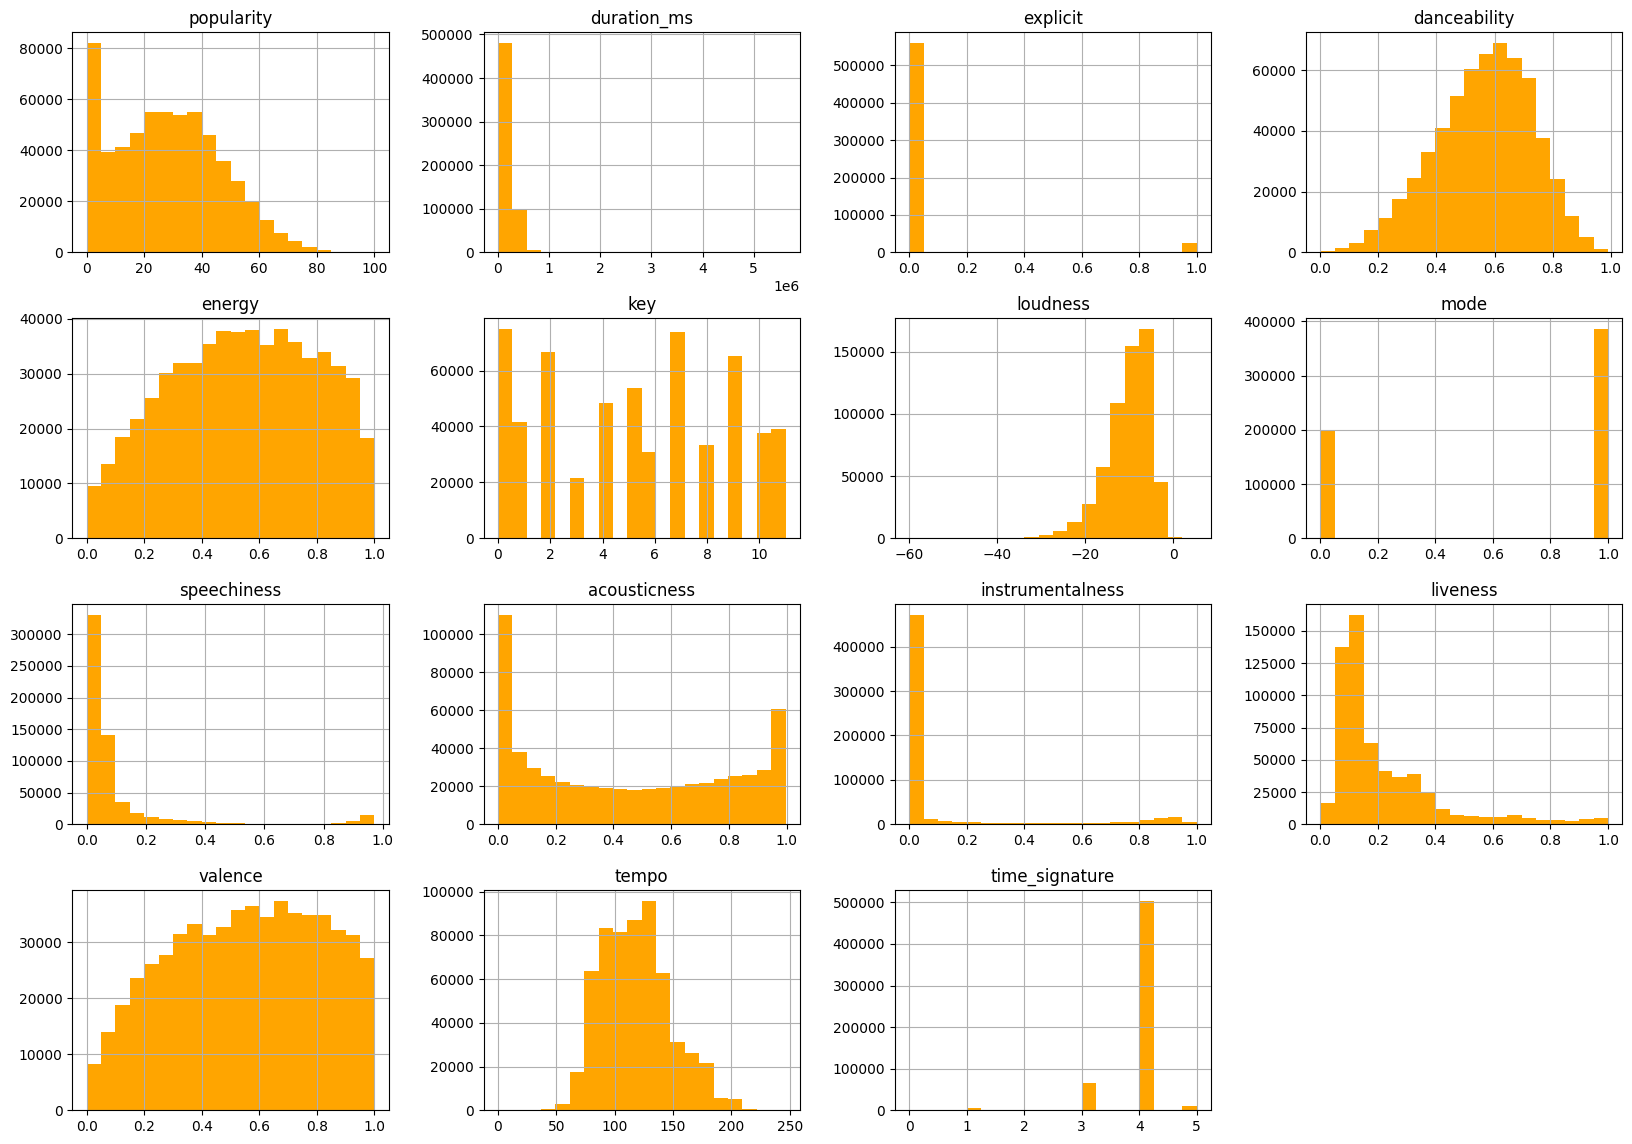

In [7]:
df.hist(bins = 20, color = 'orange', figsize = (20, 14))

In [8]:
# train test split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

train_set_df = train_set.copy()

train_set_df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [9]:
train_set_df.isnull().sum()

id                   0
name                62
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [10]:
train_set_df.duplicated().sum()

0

# Analysis 

## Categorical Data

In [11]:
categorical_df = train_set_df.select_dtypes(include = 'object')
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 469337 entries, 431626 to 121958
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            469337 non-null  object
 1   name          469275 non-null  object
 2   artists       469337 non-null  object
 3   id_artists    469337 non-null  object
 4   release_date  469337 non-null  object
dtypes: object(5)
memory usage: 21.5+ MB


In [12]:


plt.figure(figsize=(20, 14))
def visualize_word_counts(counts):
    wc = WordCloud(max_font_size = 130, min_font_size = 25, colormap = 'tab20',
                  background_color='white', prefer_horizontal = .95, width=2100,
                  height=700, random_state=0)
    cloud = wc.generate_from_frequencies(counts)
    plt.figure(figsize=(18, 15))
    plt.imshow(cloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    

<Figure size 2000x1400 with 0 Axes>

In [13]:
lead_artists = train_set_df['artists'].value_counts().head(20)
lead_artists

artists
['Die drei ???']                              3162
['TKKG Retro-Archiv']                         1595
['Benjamin Blümchen']                         1203
['Bibi Blocksberg']                           1168
['Lata Mangeshkar']                           1094
['Bibi und Tina']                              732
['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']     727
['Francisco Canaro']                           721
['Ella Fitzgerald']                            683
['Tadeusz Dolega Mostowicz']                   682
['Fünf Freunde']                               663
['Mohammed Rafi']                              626
['Queen']                                      618
['Elvis Presley']                              555
['Frank Sinatra']                              537
['The Rolling Stones']                         526
['Die Originale']                              512
['Billie Holiday']                             493
['Julio Iglesias']                             482
['Globi']              

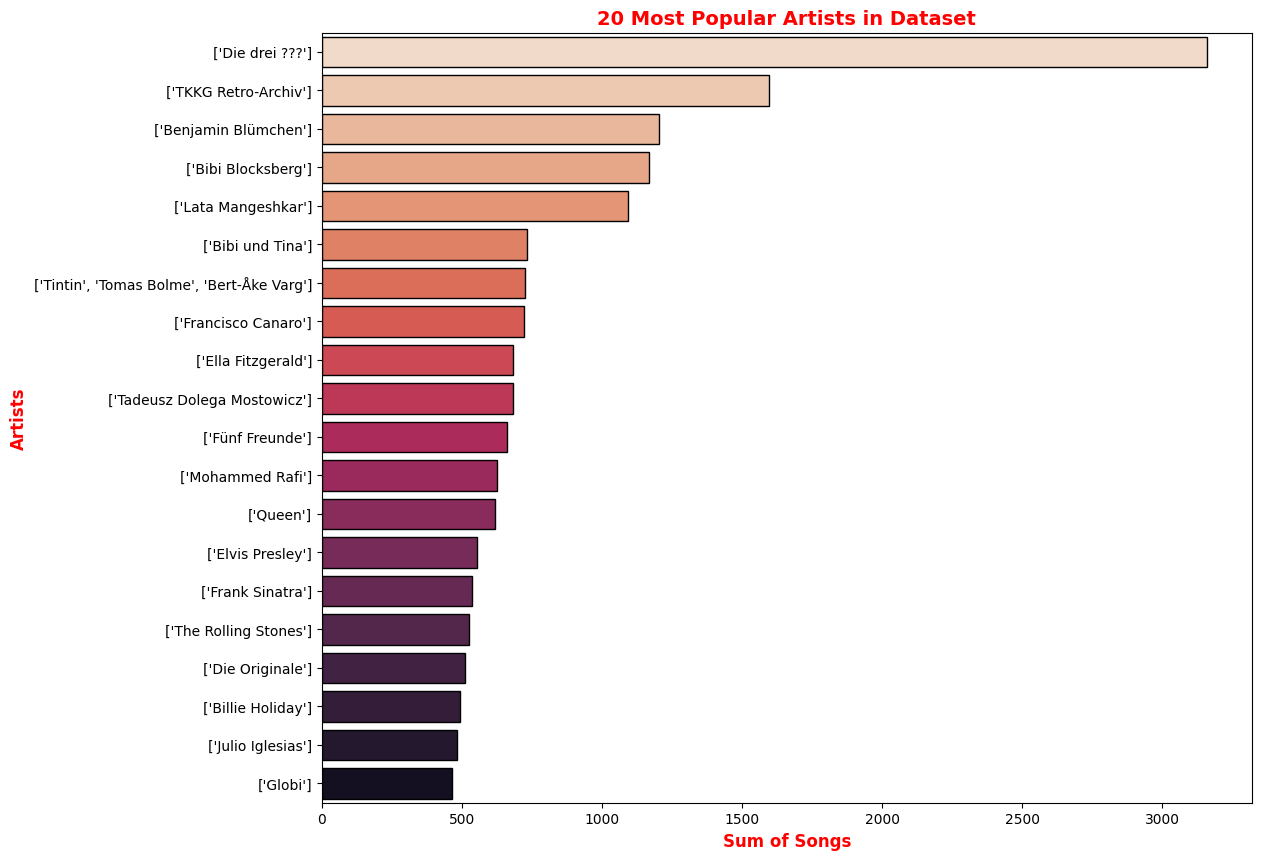

In [14]:
fig, ax = plt.subplots(figsize = (12, 10))

ax = sns.barplot(
    x = lead_artists.values,
    y = lead_artists.index,
    palette = 'rocket_r',
    orient = 'h',
    edgecolor = 'black',
    ax = ax
)

ax.set_xlabel('Sum of Songs', c = 'r', fontsize = 12, weight = 'bold')
ax.set_ylabel('Artists', c = 'r', fontsize = 12, weight = 'bold')
ax.set_title('20 Most Popular Artists in Dataset', c = 'r', fontsize = 14, weight = 'bold')

plt.show()

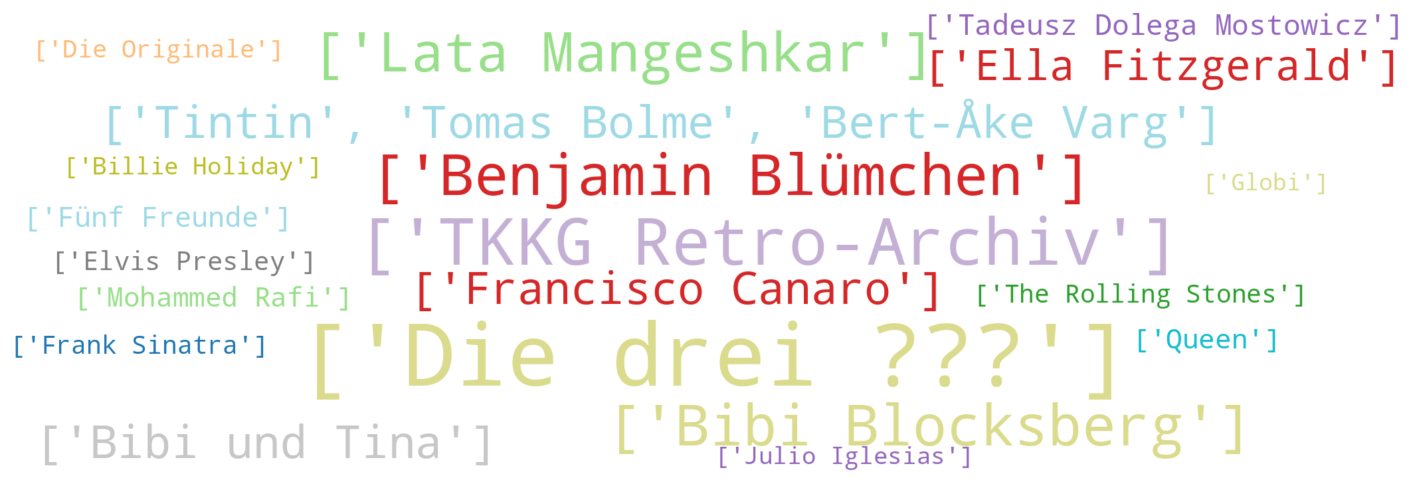

In [15]:
visualize_word_counts(lead_artists)

## Datetime data

Converting the columns 'release_date' to datetime datatype

In [16]:
train_set_df.release_date = pd.to_datetime(train_set_df.release_date, dayfirst=True , format='mixed')
train_set_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
431626,1UesCGS400XyKjpUG4lth6,Picadeiro do Tempo,21,206933,0,['Geraldo Azevedo'],['65TbyndeGrDlFd4IkZNfbN'],1989-03-12,0.700,0.385,0,-13.987,1,0.0310,0.724000,0.000002,0.0605,0.675,90.241,4
481382,2kyiY8sWKqZrdd4tFGKWop,Cunumicita,26,163600,0,['Guisela Santa Cruz'],['2CJpzQx9x892GxQyVBGhG0'],2016-01-12,0.637,0.839,2,-4.454,0,0.0344,0.486000,0.000000,0.1840,0.809,87.555,4
41728,5sRPMmQV21r5FhNZSxzZ0O,Elenore - Remastered,47,149280,0,['The Turtles'],['2VIoWte1HPDbZ2WqHd2La7'],1968-08-19,0.634,0.586,4,-9.597,1,0.0400,0.616000,0.000159,0.5220,0.864,123.288,4
419851,12NPuci6I4GxnLcDms2p5T,7 Zile,36,231288,0,['Florin Salam'],['6Ujb9g9pljLl91qELsPZYo'],2015-12-17,0.820,0.814,10,-5.338,1,0.0397,0.019800,0.000003,0.1750,0.935,140.017,4
172826,00WbLoO3bSlUdAy8al106S,Gently,52,294000,0,['Slipknot'],['05fG473iIaoy82BF1aGhL8'],2001-01-01,0.295,0.961,2,-4.605,1,0.0997,0.000024,0.670000,0.2030,0.196,136.882,4


In [17]:
print('Minimum release date : ' + str(train_set_df.release_date.min()))
print('Maximum release date : ' + str(train_set_df.release_date.max()))

Minimum release date : 1922-01-01 00:00:00
Maximum release date : 2021-04-16 00:00:00


#### Number of songs per year

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



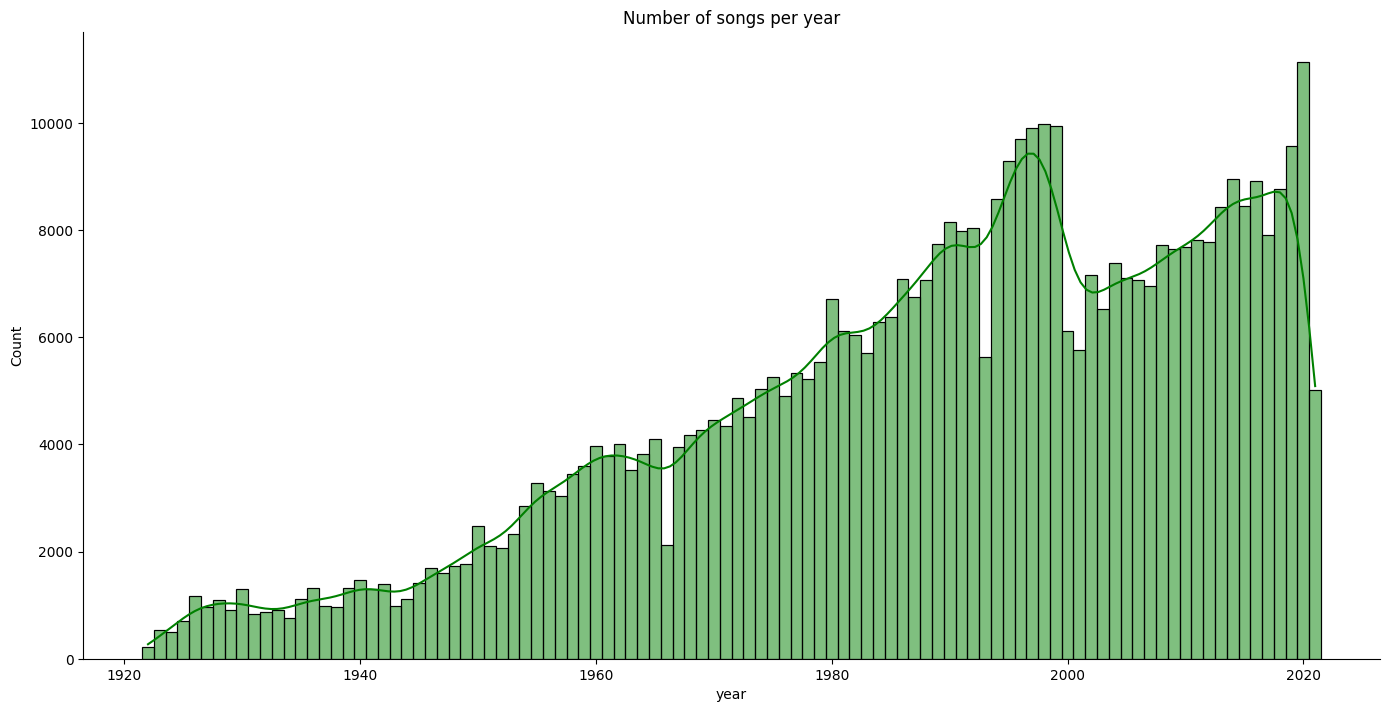

In [18]:
train_set_df['year'] = train_set_df['release_date'].dt.year

sns.displot(
    train_set_df['year'], discrete = True, aspect = 2, height = 7,
    kind = 'hist', kde = True, color ='green').set(
        title = 'Number of songs per year'
    )

## Most popular song on spotify

In [19]:
most_popularity = train_set_df.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False)
most_popularity.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,...,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4,2021
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,...,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4,2021
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,...,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4,2021
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,...,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4,2020
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,...,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4,2020
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,...,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,2020
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,...,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4,2021
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,...,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4,2020
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,...,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3,2020
93806,7Bk0uXKk1uPT0XuQbpFzvs,Fiel,94,261667,0,"['Los Legendarios', 'Wisin', 'Jhay Cortez']","['0n6sKrG0xKAf8xmdqeNGke', '3E6xrwgnVfYCrCs0eP...",2021-02-04,0.849,0.701,...,-4.407,0,0.0600,0.40700,0.000000,0.1120,0.505,98.005,4,2021


In [20]:
lead_songs = most_popularity[['name', 'popularity']].head(20)
lead_songs

,name,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),100
93803,drivers license,99
93804,Astronaut In The Ocean,98
92811,telepatía,97
92810,Save Your Tears,97
92813,Blinding Lights,96
93805,Leave The Door Open,96
92814,The Business,95
92816,Heartbreak Anniversary,94
93806,Fiel,94


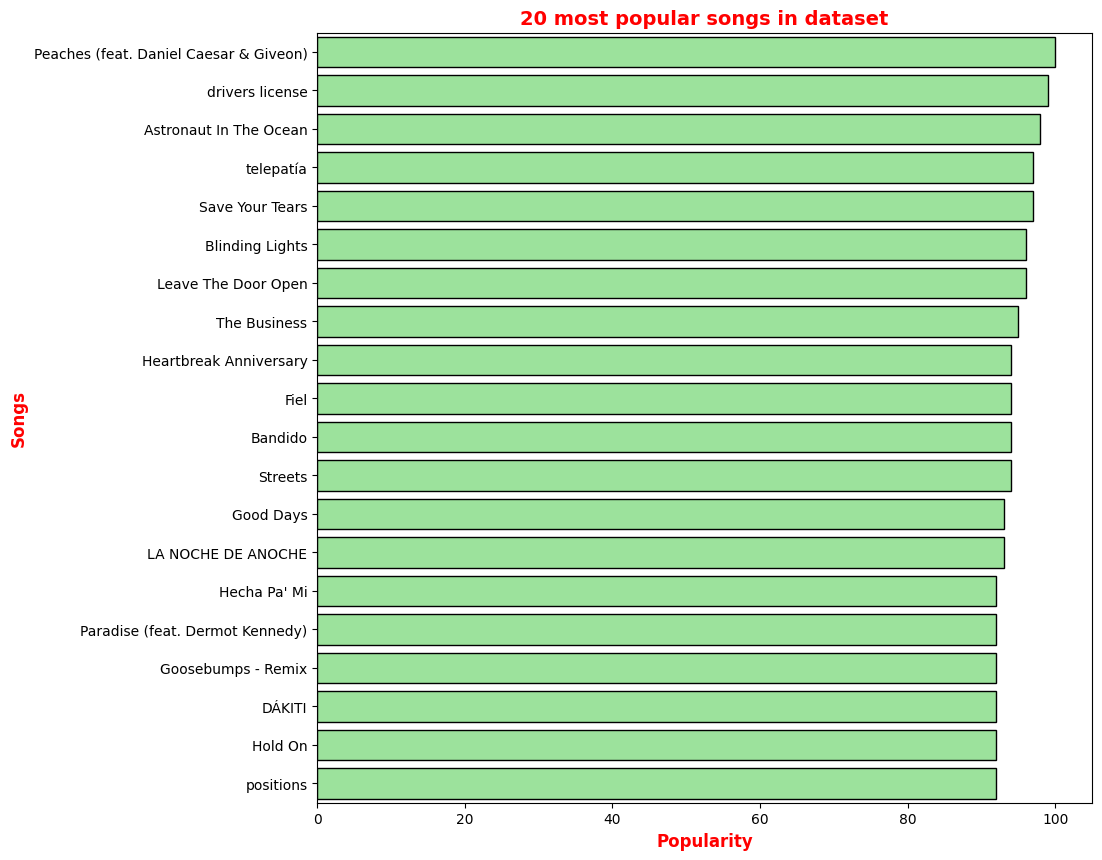

In [21]:
fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(
    x = lead_songs.popularity,
    y = lead_songs.name,
    color = 'lightgreen',
    orient = 'h',
    edgecolor = 'black',
    ax = ax
)
ax.set_xlabel('Popularity', c = 'red', fontsize= 12 , weight = 'bold')
ax.set_ylabel('Songs', c ='red', fontsize=12, weight = 'bold')
ax.set_title('20 most popular songs in dataset', c = 'red', fontsize = 14, weight = 'bold')

plt.show()

In [22]:
feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness' , 'instrumentalness', 'liveness', 'valence']

mean_vals = pd.DataFrame(columns = feat_cols)
mean_vals = pd.concat([mean_vals, most_popularity[feat_cols].mean()], ignore_index = True)
mean_vals = pd.concat([mean_vals, train_set_df[feat_cols].mean()], ignore_index = True)

print(mean_vals)

fig = go.Figure(
    data = [
        go.Scatterpolar(r = mean_vals.iloc[0], theta = feat_cols, fill = 'toself', name = 'Top 100'),
        go.Scatterpolar(r = mean_vals.iloc[1], theta = feat_cols, fill = 'toself', name = 'All')
    ],
    layout = go.Layout(
        title = go.layout.Title(text = 'Feature comparision'),
        polar = {'radialaxis': {'visible': True}},
        showlegend = True
    )
)

fig.show()

   danceability energy speechiness acousticness instrumentalness liveness  \
0           NaN    NaN         NaN          NaN              NaN      NaN   
1           NaN    NaN         NaN          NaN              NaN      NaN   
2           NaN    NaN         NaN          NaN              NaN      NaN   
3           NaN    NaN         NaN          NaN              NaN      NaN   
4           NaN    NaN         NaN          NaN              NaN      NaN   
5           NaN    NaN         NaN          NaN              NaN      NaN   
6           NaN    NaN         NaN          NaN              NaN      NaN   
7           NaN    NaN         NaN          NaN              NaN      NaN   
8           NaN    NaN         NaN          NaN              NaN      NaN   
9           NaN    NaN         NaN          NaN              NaN      NaN   
10          NaN    NaN         NaN          NaN              NaN      NaN   
11          NaN    NaN         NaN          NaN              NaN      NaN   

## Most danceable songs

In [23]:
most_danceable = train_set_df.sort_values(by ='danceability', ascending = False).head(10)
most_danceable

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
418558,4tq7Q9bTkLqzXNUi8PVmk2,Puisorul cafeniu,15,84707,0,['Malina Olinescu'],['6KZH1ER38F5smKpXKmLRwb'],2002-01-01,0.991,0.422,...,-11.093,1,0.2470,0.307000,0.017600,0.0788,0.994,119.975,4,2002
252256,7yCtSls77Pnz8R4etGfHe5,Tío Mario,11,101760,0,['Susana Bosch'],['7FSDwf9FSxPM0TnnbuBRUi'],1998-07-01,0.988,0.459,...,-6.631,1,0.1300,0.124000,0.000000,0.0749,0.930,114.849,4,1998
62569,5YIF6HSOtHN9HdcE5IPzMe,Funky Cold Medina,58,248160,0,['Tone-Loc'],['5Y8EphH8Vdqu5SLj6K5vjj'],1989-01-01,0.988,0.633,...,-15.012,0,0.0888,0.075500,0.000002,0.0668,0.929,117.493,4,1989
356102,5GFwJHucflHj46Hwet6qvc,Cool - Leonardo La Mark Remix,0,361967,0,"['Spooner Street', 'Rio Dela Duna', 'Leonardo ...","['69Jnii2nKzGXwTz2CNR82H', '5McLuoTfnILw7AYs1I...",2021-01-15,0.987,0.649,...,-6.727,1,0.2770,0.000626,0.379000,0.0686,0.458,122.002,4,2021
74928,6G7Gtq7ymFvYuqcJSAW9cA,New Year (2021),0,42250,0,"['xxrichbeats', 'Egor4ik']","['49FLHDHX5mD9Pbm6JwLujJ', '01KisSmrh9sNoIzqT6...",2021-01-20,0.987,0.293,...,-11.453,0,0.1990,0.003210,0.000010,0.1280,0.502,119.974,4,2021
303940,1MgM0WDaoQ2A3bnIQTR6ty,Go Girl,55,229669,1,"['Pitbull', 'Trina', 'Young Bo']","['0TnOYISbd1XYRBk9myaseg', '4PrinKSrmILmo0kERG...",2012-05-08,0.986,0.597,...,-6.809,1,0.3080,0.145000,0.000002,0.1970,0.761,115.004,4,2012
131805,2ppnJ8Wz2US6hbHGX61zy4,O mama mama - Remix 2014,0,211620,0,['Nilla Pizzi'],['0Aa0gR6RQfMmo529QX1Gbh'],2014-11-27,0.985,0.522,...,-10.259,1,0.2860,0.124000,0.902000,0.1320,0.691,125.006,4,2014
84281,2ui62KKhQgwsUF8afLpyXZ,Funky Cold Medina - Re-Recorded,8,249464,0,['Tone-Loc'],['5Y8EphH8Vdqu5SLj6K5vjj'],2010-12-21,0.985,0.914,...,-7.788,1,0.1520,0.002970,0.000188,0.0408,0.805,117.003,4,2010
56990,1JLU51CdgQhWWWokxrbOPM,Como uma onda - Zen-surfismo,45,201400,0,['Lulu Santos'],['0A1oy7PC7fdzURgaLaWkL1'],1983-10-20,0.985,0.379,...,-11.910,0,0.1080,0.161000,0.895000,0.0983,0.889,116.477,4,1983
539336,3uoEsMvgRoJH5zhuRyKWRy,Sinabmarin,50,317640,0,['Andrew E.'],['6TcTgRYJBQzadIFeXXWA3I'],2002-01-28,0.984,0.608,...,-8.757,1,0.0553,0.010600,0.000000,0.1180,0.972,114.648,4,2002


## Song with most energy

In [24]:
most_energy = train_set_df.sort_values(by = 'energy', ascending = False).head(10)
most_energy

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
85263,3sjBjWRmxbugxSmSBtrZBw,Victim,12,307129,1,['Komprex'],['6bVzbOyL6jx4dCyulI06oX'],2012-12-15,0.3490,1.0,...,0.899,0,0.3170,0.000443,0.0559,0.308,0.04650,174.918,4,2012
86655,16G3Plou2JqW622qSEKNY1,Proper Order (Mix Cut) - Original Mix,6,82013,0,"['Sneijder', 'Bryan Kearney']","['4zllvElH16KlgTqRstwYIb', '5fBbVsFxoa0jDCqoca...",2013-12-20,0.4080,1.0,...,-6.102,0,0.1630,0.002340,0.8800,0.706,0.25900,138.046,4,2013
12336,3RFogvPJRYXVCv9qlotTKK,Applause; Transition Back to Goodman Orchestra...,6,41093,0,['Benny Goodman'],['1pBuKaLHJlIlqYxQQaflve'],1938-01-01,0.3020,1.0,...,-22.887,0,0.0635,0.835000,0.6930,0.951,0.00001,98.839,4,1938
500552,0dDvEjTmTa1n2X7shN3gE0,Aua im Kopf (Morgen sind wir schlauer...),51,205251,0,['Tobee'],['5HvFk00KrkDIPJuzSLFd0r'],2016-05-06,0.7360,1.0,...,-1.820,0,0.1280,0.055900,0.0000,0.354,0.79100,144.060,4,2016
439193,6RgQmauf93zxmgsLoTXztG,All For Love (FYHYM2020) - Giuseppe Ottaviani ...,7,83437,0,"['Craig Connelly', 'Siskin', 'Giuseppe Ottavia...","['78UUH1buA0gDtDnkX2dPgL', '6egwmgA3pYD9IF1jdi...",2020-12-30,0.3490,1.0,...,-5.703,1,0.0774,0.000014,0.8940,0.563,0.40000,137.954,3,2020
304135,4QwP2x57owaPdkAeIjk4ul,Napalm Poet (Mix Cut) - Original Mix,2,69573,0,['Adam Ellis'],['5tGHR2wsaFZhRzRPRZDFds'],2013-12-20,0.4040,1.0,...,-5.992,1,0.1030,0.000013,0.8890,0.360,0.29100,138.000,4,2013
2353,2cODstPu4nOAIFfwnvNEwx,Moi J'fais Mes Coups En Dessous,0,190493,0,['Maurice Chevalier'],['3QXjI80udwDSEfxK5BjUXc'],1926-01-01,0.1660,1.0,...,-4.373,0,0.0643,0.131000,0.3110,0.333,0.00001,116.707,3,1926
237836,6lnmUwQbkS7Mpagre3YdWW,Arroyo 1 Ruido Blanco,42,315977,0,['Lullaby Land'],['4OGJOCR3m1HC87JGx8cuEQ'],2013-08-09,0.0958,1.0,...,-19.038,1,0.0617,0.741000,0.7440,0.975,0.00001,161.461,1,2013
585168,4ocpfg0qdIoOvvvtI9gEbU,Infinite Sunsets (Ray Reverse Remix) - Mixed,6,220853,0,"['Starpicker', 'Ray Reverse']","['1n6m0hJ3GGiRBqUy4mUbC3', '5GQwyzOr0W81TA2Ahc...",2020-12-25,0.4230,1.0,...,-5.454,0,0.1200,0.000304,0.6890,0.491,0.03780,139.018,4,2020
443752,2bkU0FBTY8blZ4V40ofED6,Rain on Window (Glass Raining Rainy Weather Ho...,43,79000,0,['Finnolia Sound Effects'],['7piUznRWxNyKpaPvmOSdiZ'],2013-11-08,0.2700,1.0,...,-15.369,0,0.0581,0.531000,0.9690,0.779,0.00611,95.463,4,2013


## Songs most likely to create positive feelings

In [25]:
most_valence = train_set_df.sort_values(by = 'valence', ascending = False).head(10)
most_valence

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
288680,4czwRicqbT6JES6kIg7KUE,Ο ύμνος του ΠΑΝΑΘΗΝΑΪΚΟΥ,7,113000,0,['Λάκης Γαβαλάς'],['6Ga2m0HBbLE05XTUEpAVVt'],1978-01-01,0.956,0.519,...,-11.044,1,0.0588,0.6020,0.000036,0.1040,1.0,133.180,4,1978
322066,6SHlkNPxTA1ZlVVuAW74dY,Voluvisa,13,146000,0,['Halldor Waren'],['2Ye1dPoVQvszrnFzO7Ffbc'],2008-12-01,0.849,0.421,...,-11.378,0,0.1240,0.8850,0.847000,0.1120,1.0,110.037,4,2008
236547,3rHsX3TLPYixr7eGzRlZqI,Pasito Duranguense,51,200213,0,['Montez de Durango'],['1i4xi4ramy5BPYr2Bhf6sc'],2002-01-04,0.912,0.824,...,-5.163,1,0.0831,0.0776,0.541000,0.0260,1.0,144.925,4,2002
541260,0gseo05ForQsYboa02I8Z5,The Little Girl From Mars,15,178000,0,['Jean-Jacques Perrey'],['09x9KmiHgFJgWySzkMRNGx'],1968-01-01,0.732,0.702,...,-9.420,1,0.1480,0.5170,0.224000,0.1120,1.0,145.185,4,1968
322093,0Tz023PcPX4JsVFtOCU5o4,Lausavisur,11,74027,0,['Halldor Waren'],['2Ye1dPoVQvszrnFzO7Ffbc'],2008-12-01,0.940,0.328,...,-11.092,1,0.1920,0.6510,0.993000,0.0565,1.0,120.126,4,2008
206971,6NcXXqOUOTrqoJvzzFNNB3,Noches Vacias,33,232000,0,['Karolina'],['5UCcU04GZsZJY2g2qmisNp'],1992-01-01,0.753,0.524,...,-15.816,1,0.0531,0.4480,0.475000,0.0399,1.0,105.861,4,1992
561584,6UqI7jUTznpqib3q2ZeBvr,やさしさに包まれたなら,42,148562,0,['Full Tone'],['0EQYiwIZqQrwzAvqMhwwQt'],2017-07-12,0.742,0.424,...,-14.106,1,0.0601,0.9750,0.896000,0.0731,1.0,145.989,4,2017
322002,3hd9GXM0Ahb3wsyETmATPZ,Loan Er Komin,18,71947,0,['Halldor Waren'],['2Ye1dPoVQvszrnFzO7Ffbc'],2008-12-01,0.838,0.442,...,-9.052,1,0.3050,0.8950,0.050900,0.0721,1.0,110.111,4,2008
322102,47XYOIV7xMlGQ7sfkfw1X8,Glettinn Maninn,11,71813,0,['Halldor Waren'],['2Ye1dPoVQvszrnFzO7Ffbc'],2008-12-01,0.860,0.406,...,-11.792,1,0.1330,0.9210,0.241000,0.2470,1.0,110.041,4,2008
322056,5B9796p9CkG9BMDhgFZ3Rk,Alfareidin ( Stod Eg Ut I ),13,153120,0,['Halldor Waren'],['2Ye1dPoVQvszrnFzO7Ffbc'],2008-12-01,0.774,0.454,...,-9.386,1,0.1120,0.6910,0.957000,0.0823,1.0,100.111,4,2008


# Univariate Analysis

#### summary stats

In [26]:
train_set_df.describe()

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
count,469337.000000,4.693370e+05,469337.000000,469337,469337.000000,469337.000000,469337.000000,469337.000000,469337.000000,469337.000000,469337.000000,469337.000000,469337.000000,469337.000000,469337.00000,469337.000000,469337.000000
mean,27.571804,2.299930e+05,0.044292,1988-11-13 10:12:12.108484736,0.563675,0.541894,5.220752,-10.206763,0.658934,0.105061,0.450091,0.113490,0.214099,0.552314,118.44054,3.873228,1988.560612
min,0.000000,3.344000e+03,0.000000,1922-01-01 00:00:00,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1922.000000
25%,13.000000,1.750530e+05,0.000000,1974-01-01 00:00:00,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.097200,0.000000,0.098300,0.346000,95.59100,4.000000,1974.000000
50%,27.000000,2.148800e+05,0.000000,1992-07-31 00:00:00,0.577000,0.549000,5.000000,-9.245000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.35100,4.000000,1992.000000
75%,41.000000,2.638380e+05,0.000000,2007-09-18 00:00:00,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076400,0.785000,0.009630,0.278000,0.769000,136.26900,4.000000,2007.000000
max,100.000000,5.621218e+06,1.000000,2021-04-16 00:00:00,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,243.75900,5.000000,2021.000000
std,18.390107,1.266199e+05,0.205744,NaN,0.166081,0.251906,3.520771,5.088884,0.474068,0.180309,0.348871,0.266998,0.184521,0.257663,29.75286,0.472743,22.836895


## Distribution

#### Histogram

/tmp/ipykernel_17/2838836833.py:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldco

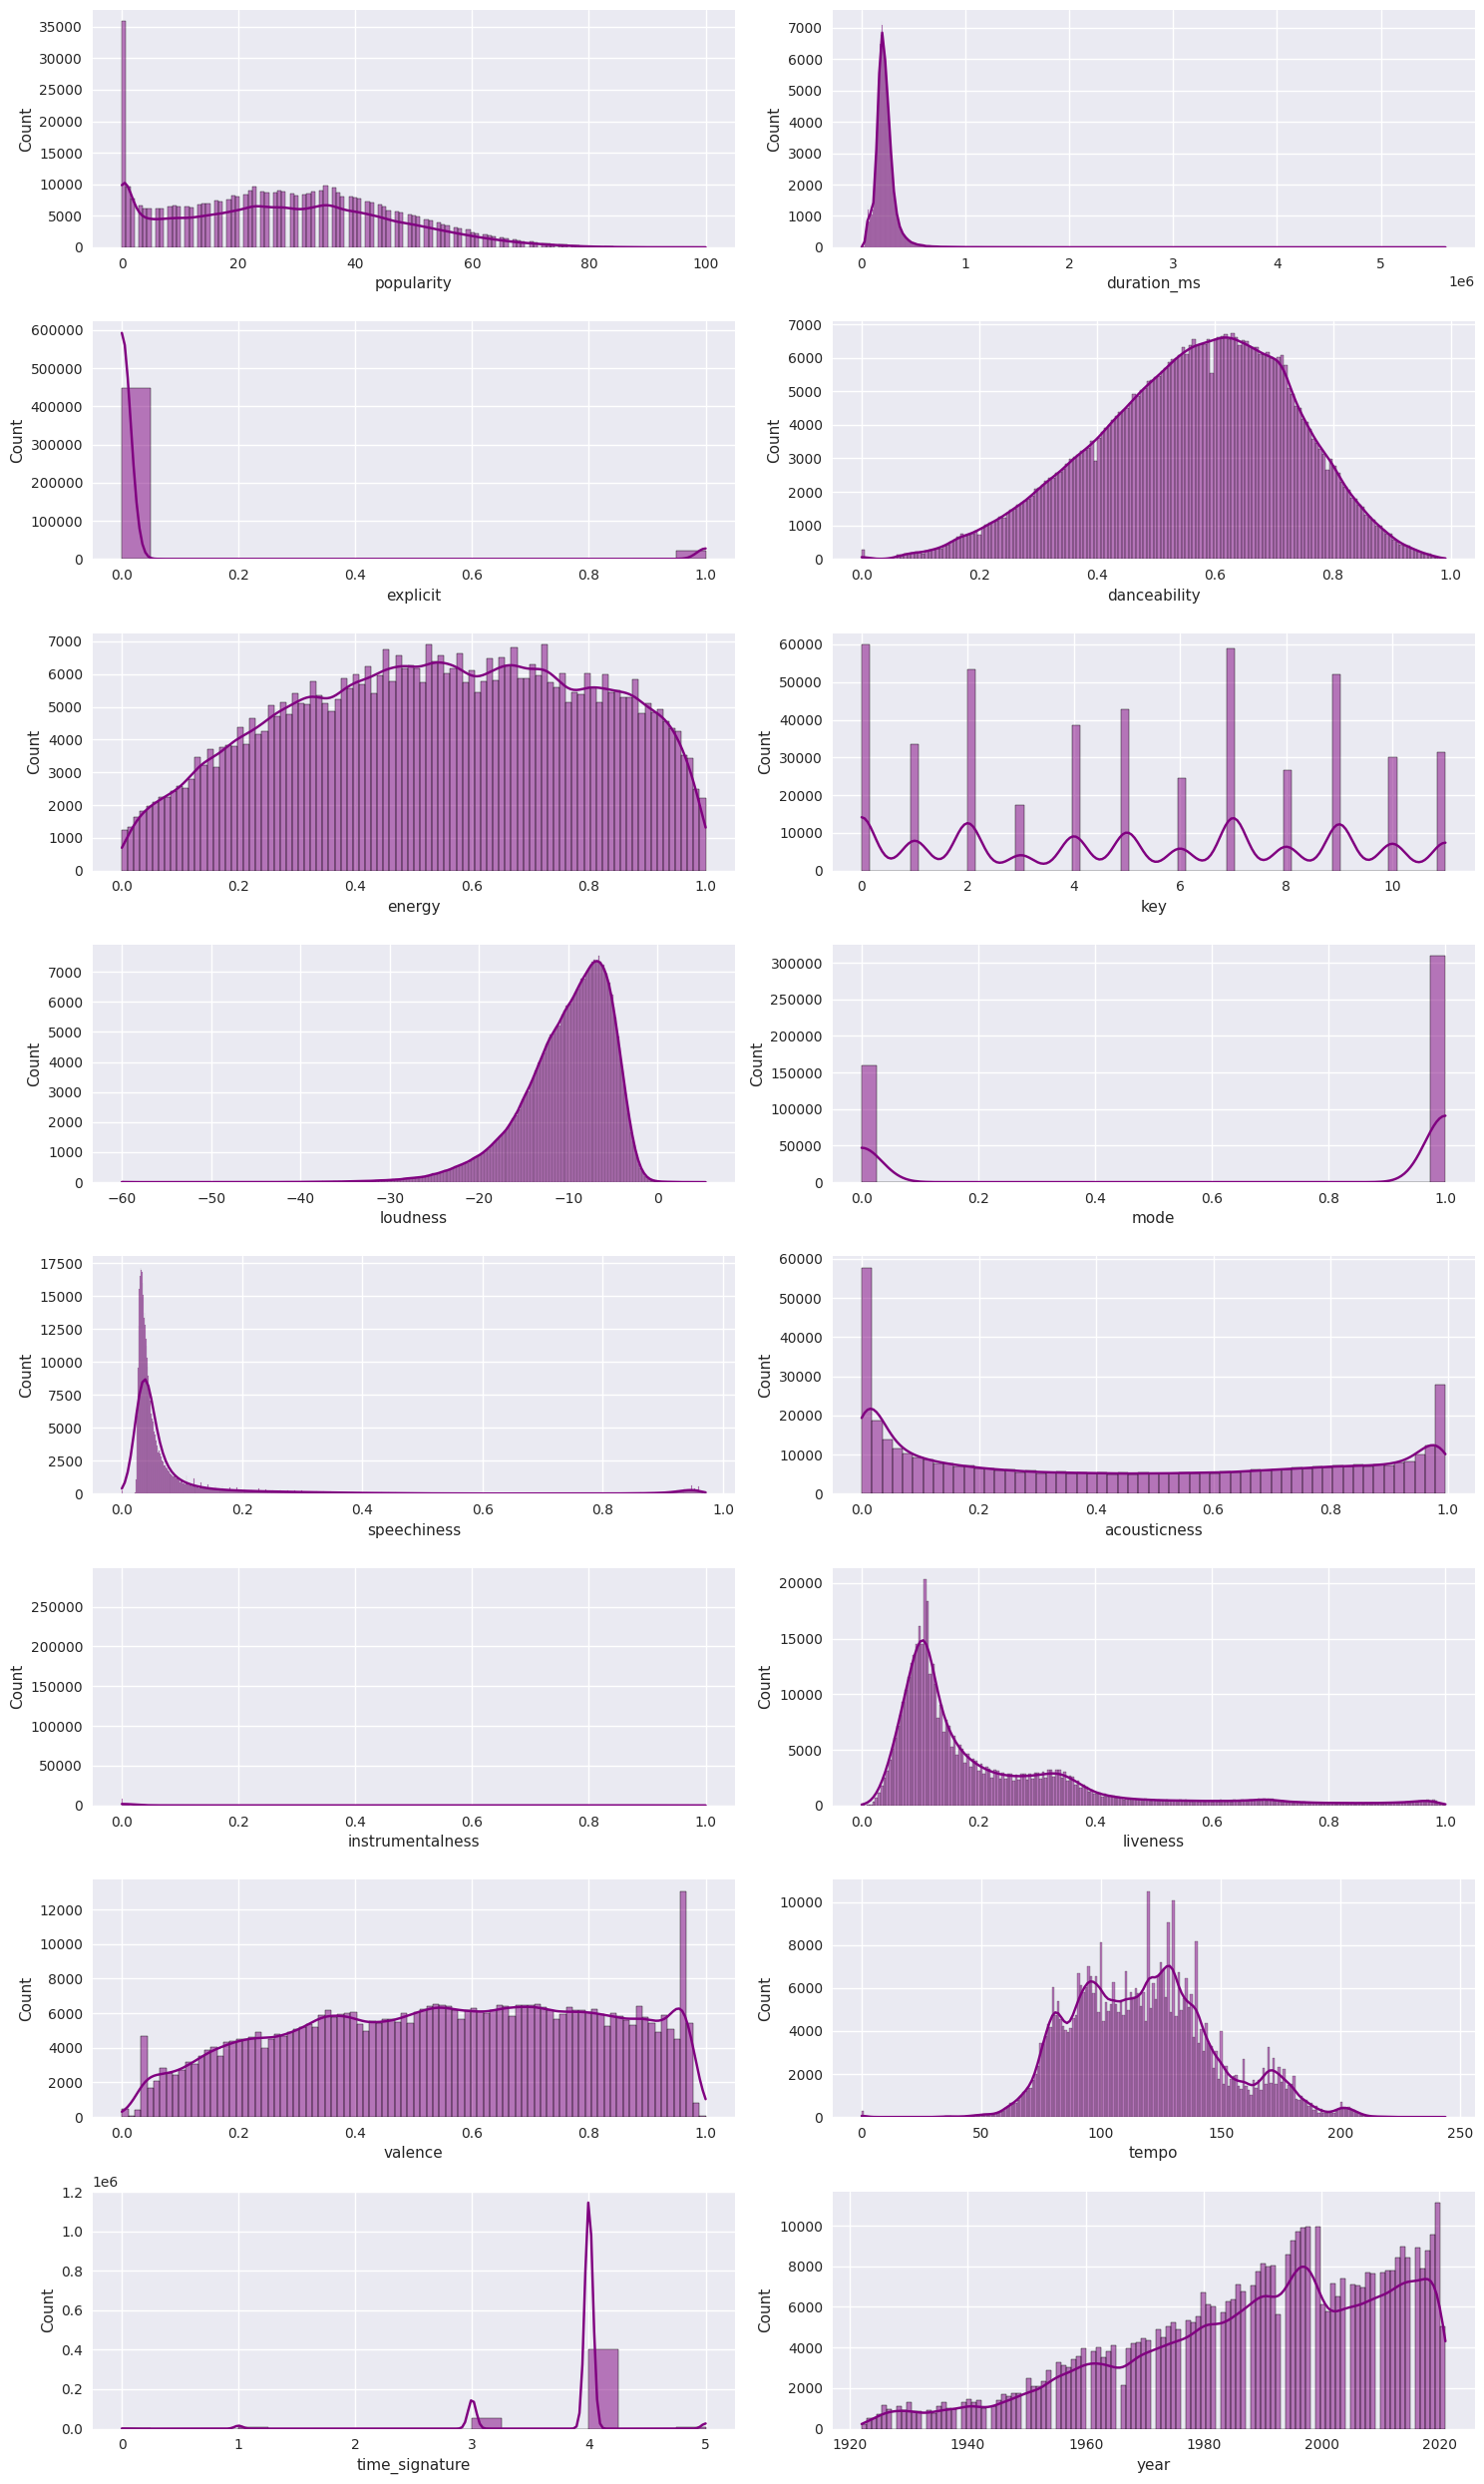

In [27]:
num_df = train_set_df.select_dtypes(include = 'number')

plt.style.use('seaborn')

names = list(num_df.columns)
plot_per_row = 2

f, axes = plt.subplots(round(len(names) / plot_per_row), plot_per_row, figsize = (15, 25))

y = 0
for name in names:
    i, j = divmod(y, plot_per_row)
    sns.histplot(
        x = train_set_df[name],
        kde = True,
        ax = axes[i, j],
        color = 'purple'
    )
    y = y + 1

plt.tight_layout()
plt.show()

#### Boxplots


/tmp/ipykernel_17/745992562.py:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



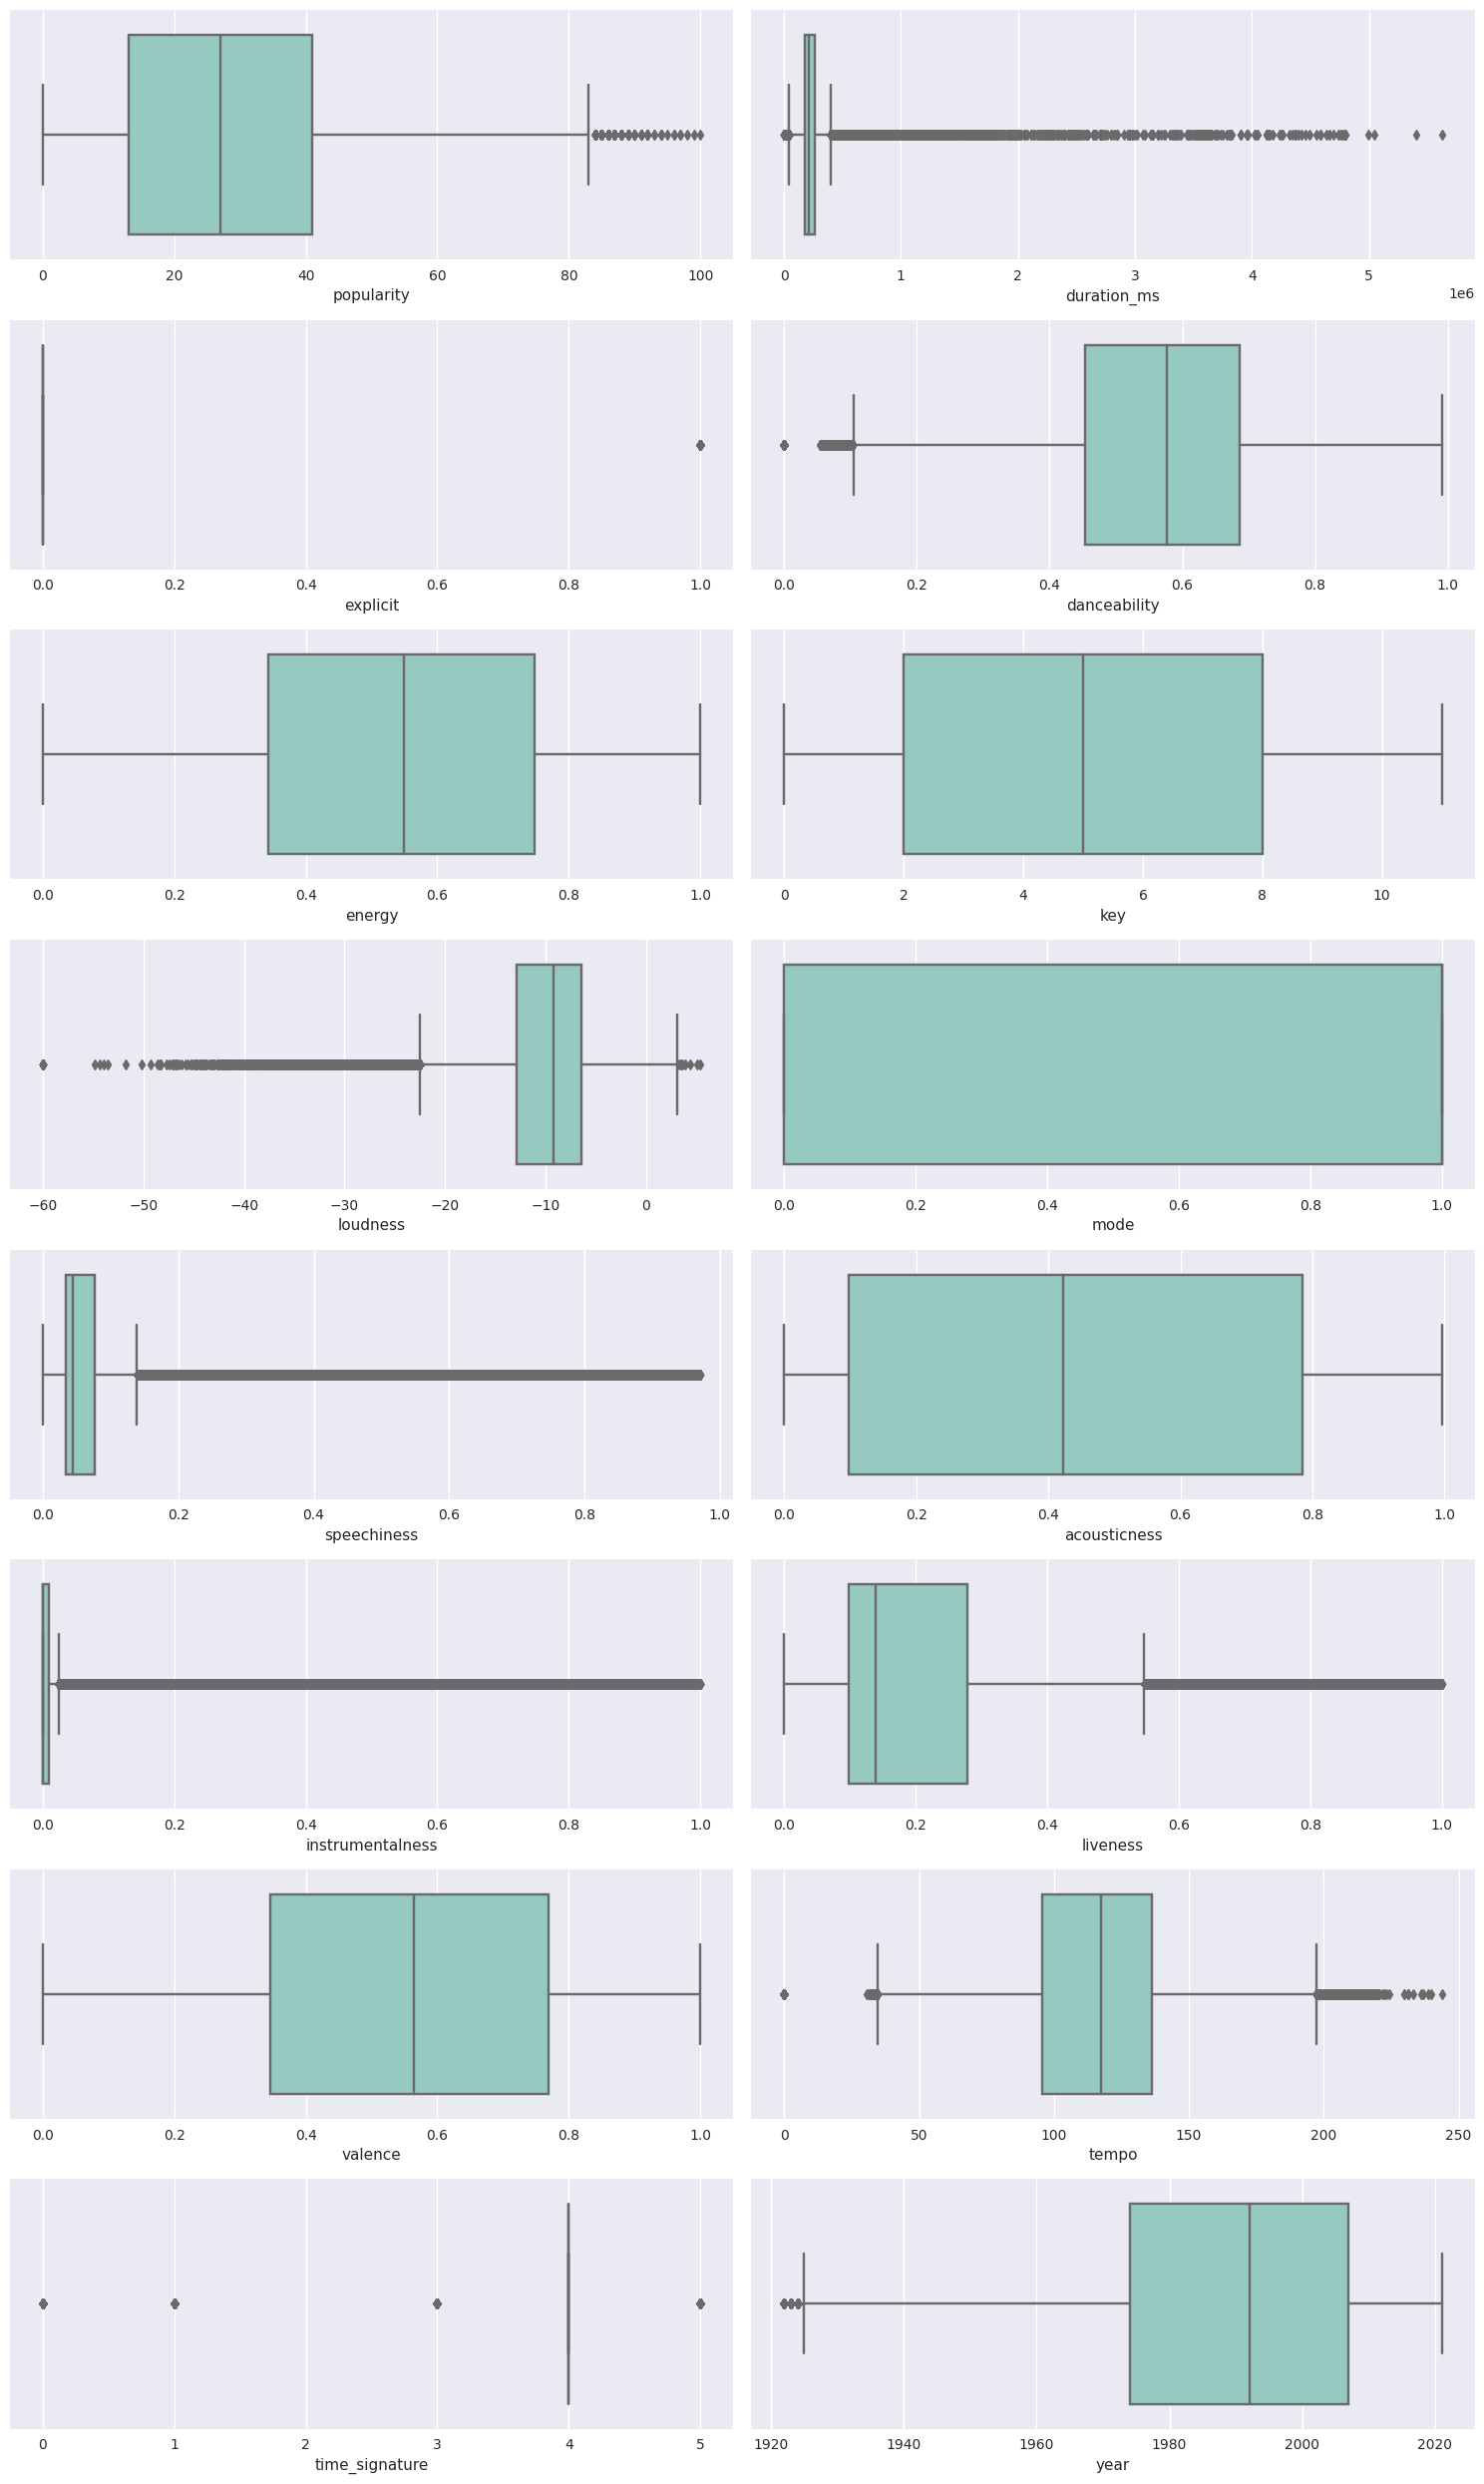

In [28]:
num_df = train_set_df.select_dtypes(include = 'number')

plt.style.use('seaborn')

names = list(num_df.columns)
plot_per_row = 2

f, axes = plt.subplots(round(len(names) / plot_per_row), plot_per_row, figsize = (15, 25))

y = 0
for name in names:
    i, j = divmod(y, plot_per_row)
    sns.boxplot(
        x = train_set_df[name],
        ax = axes[i, j],
        palette = 'Set3'
    )
    y = y + 1

plt.tight_layout()
plt.show()

# Outliers

## Bivariate Analysis


#### Linear Correlation

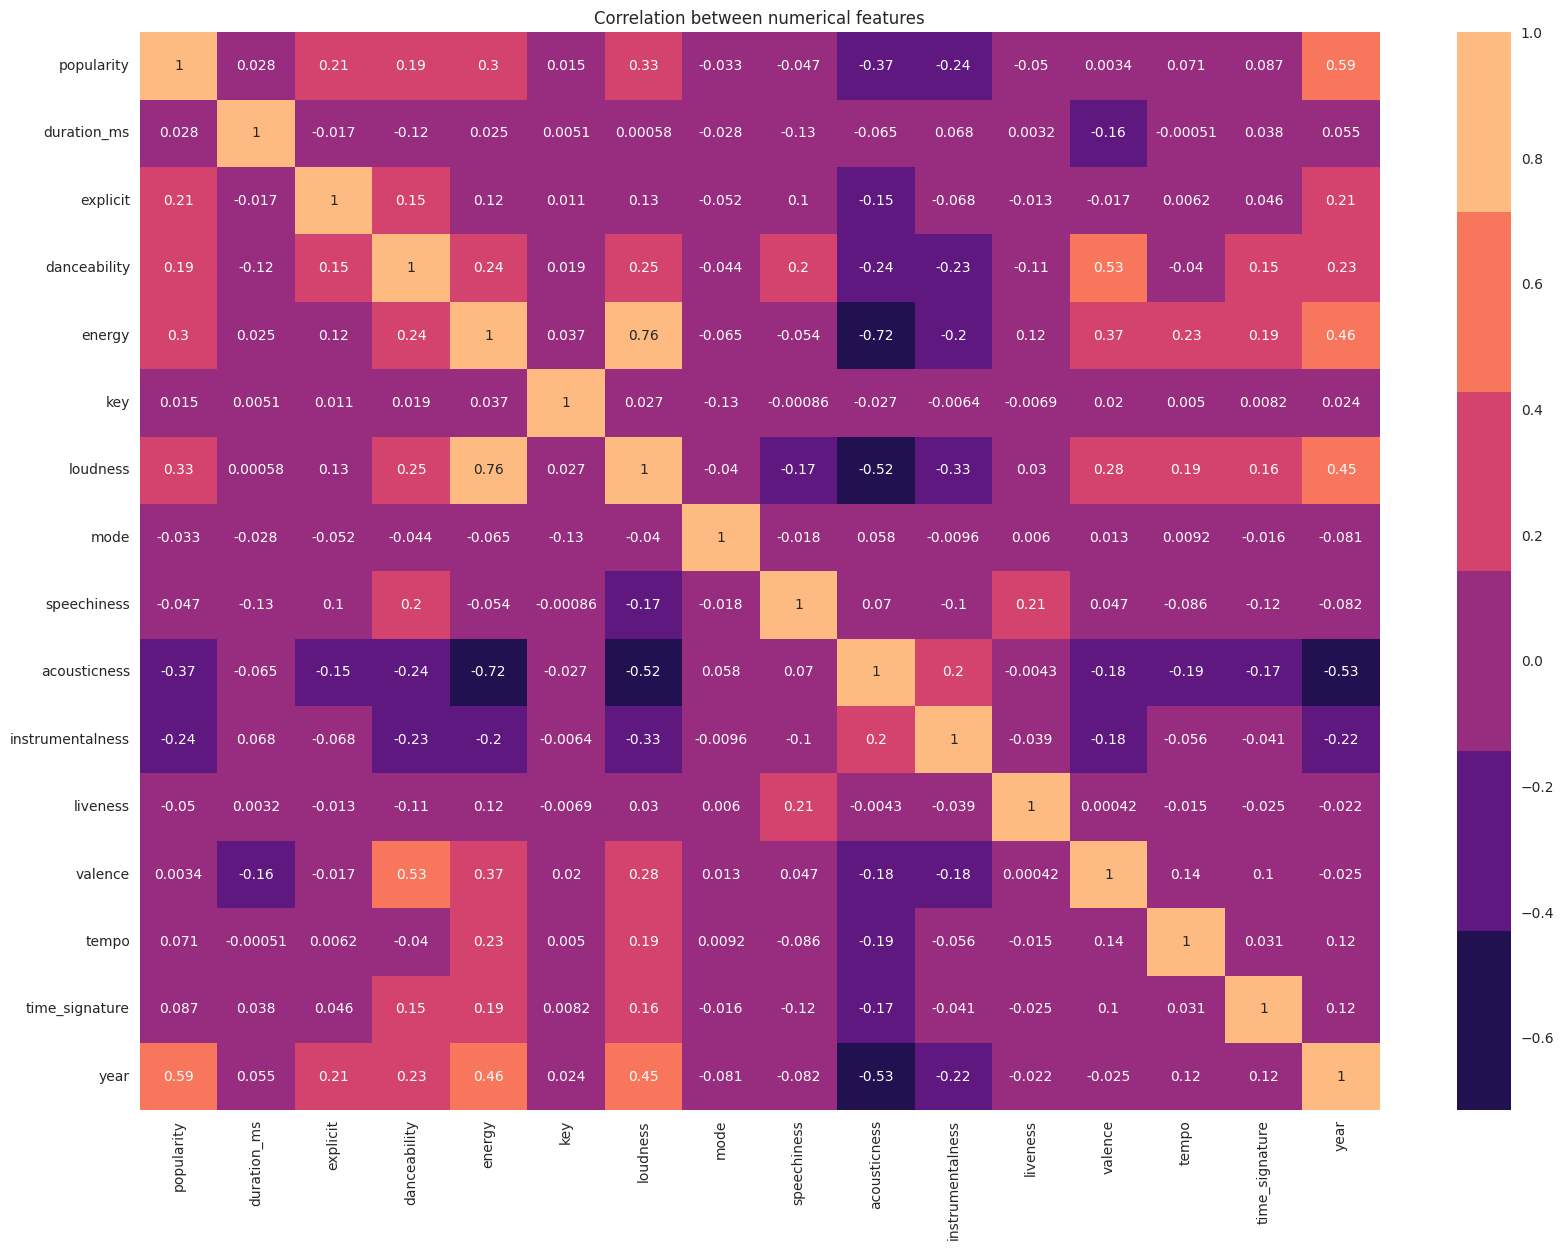

In [29]:
plt.figure(figsize = (20, 14))

corr_matrix = train_set_df.corr(numeric_only=True)
cmap = sns.color_palette('magma')
sns.heatmap(corr_matrix, annot = True, cmap = cmap)
plt.title('Correlation between numerical features')
plt.show()

In [30]:
corr_matrix['popularity'].sort_values(ascending = False)

popularity          1.000000
year                0.591336
loudness            0.326292
energy              0.302309
explicit            0.213141
danceability        0.187193
time_signature      0.086554
tempo               0.071220
duration_ms         0.028048
key                 0.015341
valence             0.003361
mode               -0.033249
speechiness        -0.047238
liveness           -0.049656
instrumentalness   -0.236121
acousticness       -0.371378
Name: popularity, dtype: float64

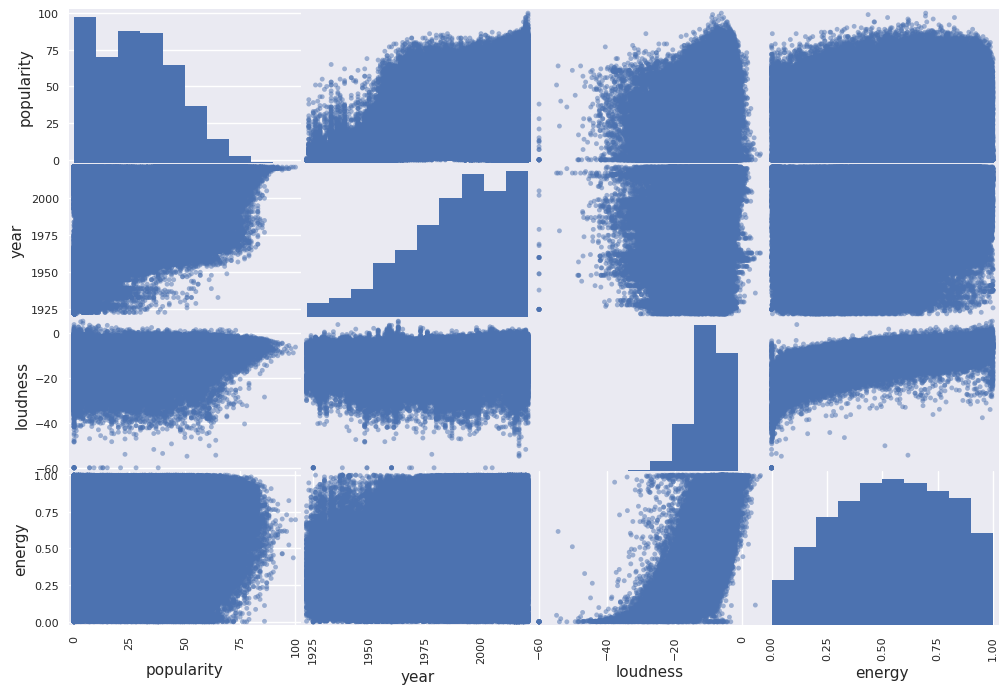

In [31]:
attributes = ['popularity', 'year', 'loudness', 'energy']
scatter_matrix(train_set_df[attributes], figsize= (12, 8))
plt.show()

# Feature Scalling


#### New Feature

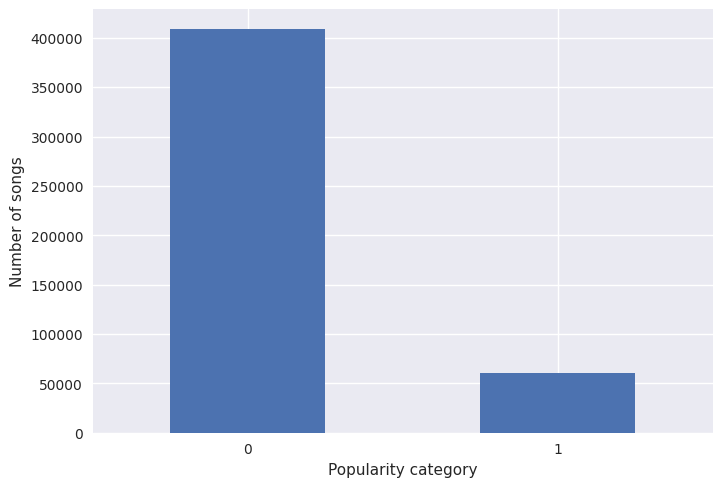

In [32]:
# feature to identify songs as highly_popular if popularity over 50
train_set_df['highly_popular'] = pd.cut(
    train_set_df['popularity'],
    bins = [0, 49, 100],
    labels = [0, 1],
    include_lowest = True
)

train_set_df['highly_popular'].value_counts().sort_index().plot.bar(
    rot = 0,
    grid = True
)
plt.xlabel("Popularity category")
plt.ylabel('Number of songs')
plt.show()

In [33]:
train_set_df['highly_popular'].value_counts()

highly_popular
0    408511
1     60826
Name: count, dtype: int64

In [34]:
train_set_df = train_set_df.drop(labels = ['popularity'], axis = 1)
train_set_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 469337 entries, 431626 to 121958
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                469337 non-null  object        
 1   name              469275 non-null  object        
 2   duration_ms       469337 non-null  int64         
 3   explicit          469337 non-null  int64         
 4   artists           469337 non-null  object        
 5   id_artists        469337 non-null  object        
 6   release_date      469337 non-null  datetime64[ns]
 7   danceability      469337 non-null  float64       
 8   energy            469337 non-null  float64       
 9   key               469337 non-null  int64         
 10  loudness          469337 non-null  float64       
 11  mode              469337 non-null  int64         
 12  speechiness       469337 non-null  float64       
 13  acousticness      469337 non-null  float64       
 14  inst

# Data Split

## Split the target variable

In [35]:
np.random.seed(42)

X_train = train_set_df.copy()
y_train = train_set_df.pop('highly_popular')


## Resampling

In [36]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

print(Counter(y_train))

Counter({0: 408511, 1: 408511})


In [37]:
df_2 = test_set.copy()
df_2['highly_popular'] = pd.cut(
    df_2['popularity'],
    bins = [0, 49, 100],
    labels = [0, 1],
    include_lowest = True
)


In [38]:
X_test = df_2.copy()
y_test = df_2.pop('highly_popular')

# Pipeline Building

In [39]:
set_config(display = 'diagram')

def monkey_patch_get_signature_names_out():
    """
    Monkey path some classes which did not handle get_feature_names_out()
    """
    default_get_feature_names_out = StandardScaler.get_feature_names_out
    
    if not hasattr(SimpleImputer, 'get_feature_names_out'):
        print('Monkey-patching SimpleImputer.get_feature_names_out()')
        
        SimpleImputer.get_feature_names_out = default_get_feature_names_out
        
    if not hasattr(FunctionTransformer, 'get_feature_names_out'):
        print('Monkey-patching FunctionTransformer.get_feature_names_out')
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)
        
        def __init__(*args, feature_names_out = None, **kwargs):
            orig_dig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out
            
        __init__.__signature__ = Signature(
            list(signature(orig_init).paramters.values()) +
            [Parameter('feature_names_out', Parameter.KEYWORD_ONLY)]
        )
        
        def get_features_names_out(self, names=  None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            
            assert self.feature_names_out == 'one-to-one'
            return default_get_feature_names_out(self, names)
        
        FunctionTransformer.__init__ = __init__
        
        FunctionTransformer.get_feature_names_out = get_feature_names_out
        
    
monkey_patch_get_signature_names_out()

In [40]:
def column_ratio(X):
    return X[:, [0]] / (1000 * 60)
    
def ratio_name(function_transformer, feature_names_in):
    return ['ratio']

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy = 'median'),
        FunctionTransformer(column_ratio, feature_names_out = ratio_name),
        RobustScaler()
    )


num_attribs = ['explicit', 'danceability', 'energy', 'key', 'loudness',
              'mode', 'speechiness', 'acousticness', 'instrumentalness',
              'liveness', 'valence', 'tempo', 'time_signature']

cat_attribs = []

num_pipeline = make_pipeline(
    SimpleImputer(strategy = 'median'),
    RobustScaler()
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy = 'most_frequency'),
    OneHotEncoder(handle_unknown = 'ignore')
)

log_pipeline = make_pipeline(
    SimpleImputer(strategy = 'median'),
    FunctionTransformer(np.log, feature_names_out = 'one-to-one'),
    RobustScaler()
)

preprocessing = ColumnTransformer([
    ('duration', ratio_pipeline(), ['duration_ms']),
    ('cat', cat_pipeline, cat_attribs),
    ('num', num_pipeline, num_attribs)
],
    remainder = 'drop'
)

In [41]:
preprocessing

ColumnTransformer(transformers=[('duration',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x7ca5bdf6fc70>,
                                                                      func=<function column_ratio at 0x7ca5bdf6f130>)),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['duration_ms']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  Simp...gy='most_frequency')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 []),
                                ('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['explicit', 'danceability', 'energy', 'key',
                                  'loudness', 'mode', 'speechiness',
                                  'acousticness', 'instrumentalness',
                                  'liveness', 'valence', 'tempo',
                                  'time_signature'])])

# Model Building

## Create a printing results function

In [42]:
def print_score(classifier, X_train, y_train, X_test, y_test):
    print('\n\n')
    print('Training results:\n')
    y_train_pred = classifier.predict(X_train)
    
    print(f'Classification Report : \n {classification_report(y_train, y_train_pred, digits = 4)}\n')
    
    print(f'ROC AUC Score : {roc_auc_score(y_train, y_train_pred)}\n')
    print(f'Confusion Matrix: \n{confusion_matrix(y_train, y_train_pred)}\n')
    
    fig, ax = plt.subplots(nrows = 1, ncols =2, figsize= (15, 6))
    ax[0].set_title("train")
    ax[1].set_title("test")
    
    print(sns.heatmap(confusion_matrix(y_train , y_train_pred), annot = True, fmt = 'g', annot_kws ={'size': 16}, ax = ax[0]))
    
    print('\n\n')
    
    # test set
    print('test results: \n')
    y_test_pred = classifier.predict(X_test)
    
    print(f'classification Report : \n {classification_report(y_test, y_test_pred, digits = 4)}\n')
    
    print(f'ROC AUC Score : {roc_auc_score(y_test, y_test_pred)}\n')
    
    print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_test_pred)}\n')
    
    print(sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt = 'g', annot_kws = {'size': 16}, ax = ax[1]))
    
    print('\n\n')

## Logistic Regression



In [43]:
classifier = Pipeline([
    ('preprocessing', preprocessing),
    ('logistic_regression', LogisticRegression())
])

classifier.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7ca5bdf6fc70>,
                                                                                       func=<function column_ratio at 0x7ca5bdf6f130>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('logistic_regression', LogisticRegression())])

In [44]:
classifier.named_steps['logistic_regression'].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}




Training results:

Classification Report : 
               precision    recall  f1-score   support

           0     0.7025    0.6708    0.6863    408511
           1     0.6850    0.7159    0.7001    408511

    accuracy                         0.6933    817022
   macro avg     0.6937    0.6933    0.6932    817022
weighted avg     0.6937    0.6933    0.6932    817022


ROC AUC Score : 0.6933387350646616

Confusion Matrix: 
[[274018 134493]
 [116056 292455]]

Axes(0.125,0.11;0.281818x0.77)



test results: 

classification Report : 
               precision    recall  f1-score   support

           0     0.9417    0.6688    0.7821    102318
           1     0.2413    0.7178    0.3612     15017

    accuracy                         0.6751    117335
   macro avg     0.5915    0.6933    0.5717    117335
weighted avg     0.8520    0.6751    0.7283    117335


ROC AUC Score : 0.6932967805730439

Confusion Matrix:
 [[68431 33887]
 [ 4238 10779]]

Axes(0.547727,0.11;0.281818x0.77)





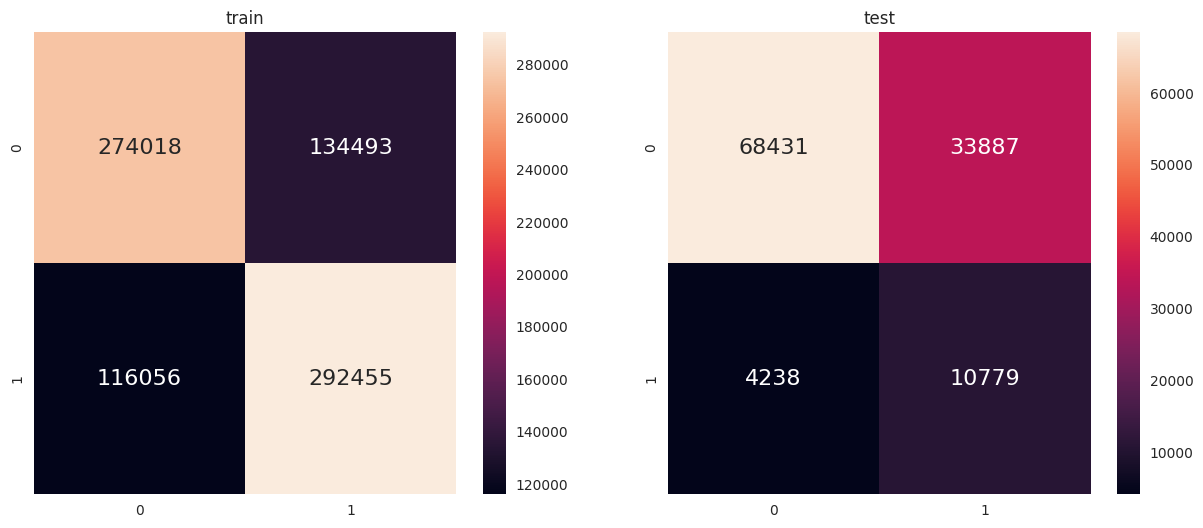

In [45]:
print_score(classifier, X_train, y_train, X_test, y_test)

In [46]:
classifier = Pipeline([
    ('preprocessing', preprocessing),
    ('logistic_regression', LogisticRegression(C = 100, penalty = 'l2', solver = 'lbfgs', max_iter = 1000))
])

classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7ca5bdf6fc70>,
                                                                                       func=<function column_ratio at 0x7ca5bdf6f130>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('logistic_regression',
                 LogisticRegression(C=100, max_iter=1000))])




Training results:

Classification Report : 
               precision    recall  f1-score   support

           0     0.7028    0.6706    0.6863    408511
           1     0.6850    0.7164    0.7003    408511

    accuracy                         0.6935    817022
   macro avg     0.6939    0.6935    0.6933    817022
weighted avg     0.6939    0.6935    0.6933    817022


ROC AUC Score : 0.693483162020117

Confusion Matrix: 
[[273950 134561]
 [115870 292641]]

Axes(0.125,0.11;0.281818x0.77)



test results: 

classification Report : 
               precision    recall  f1-score   support

           0     0.9415    0.6690    0.7822    102318
           1     0.2411    0.7167    0.3609     15017

    accuracy                         0.6751    117335
   macro avg     0.5913    0.6928    0.5715    117335
weighted avg     0.8518    0.6751    0.7283    117335


ROC AUC Score : 0.6928187164641412

Confusion Matrix:
 [[68449 33869]
 [ 4255 10762]]

Axes(0.547727,0.11;0.281818x0.77)





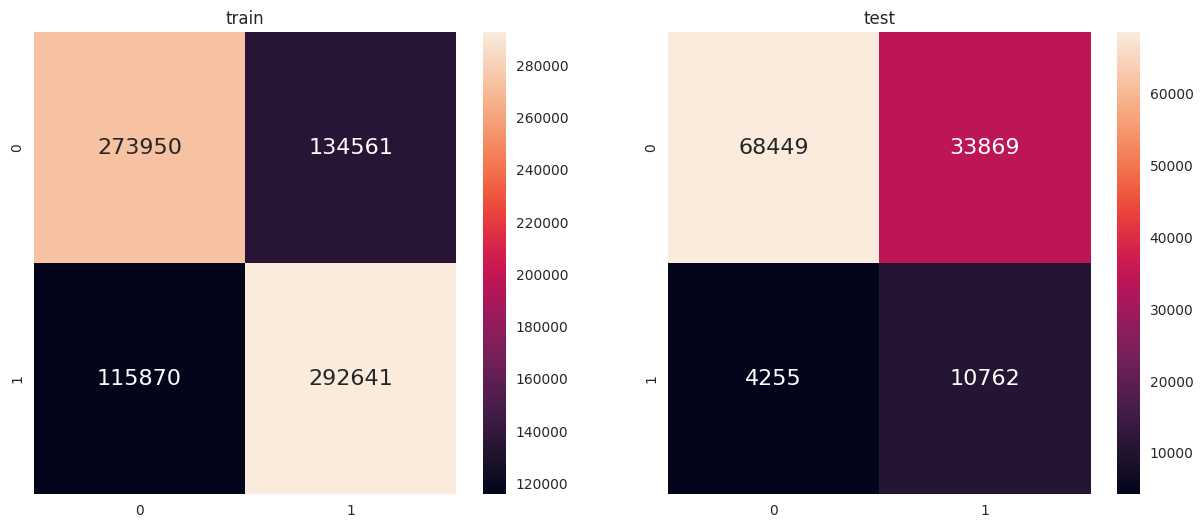

In [47]:
print_score(classifier, X_train, y_train, X_test, y_test)

In [48]:
features_names = ['duration', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

importances = pd.DataFrame(data = {
    'Attribute': features_names,
    'Importance': classifier.named_steps['logistic_regression'].coef_[0]
})

importances = importances.sort_values(by = 'Importance', ascending = False)

importances

,Attribute,Importance
1,explicit,1.416215
5,loudness,0.742172
2,danceability,0.543773
12,tempo,0.088322
4,key,0.016575
13,time_signature,0.014957
6,mode,0.012599
9,instrumentalness,-0.001356
0,duration,-0.024494
7,speechiness,-0.078437


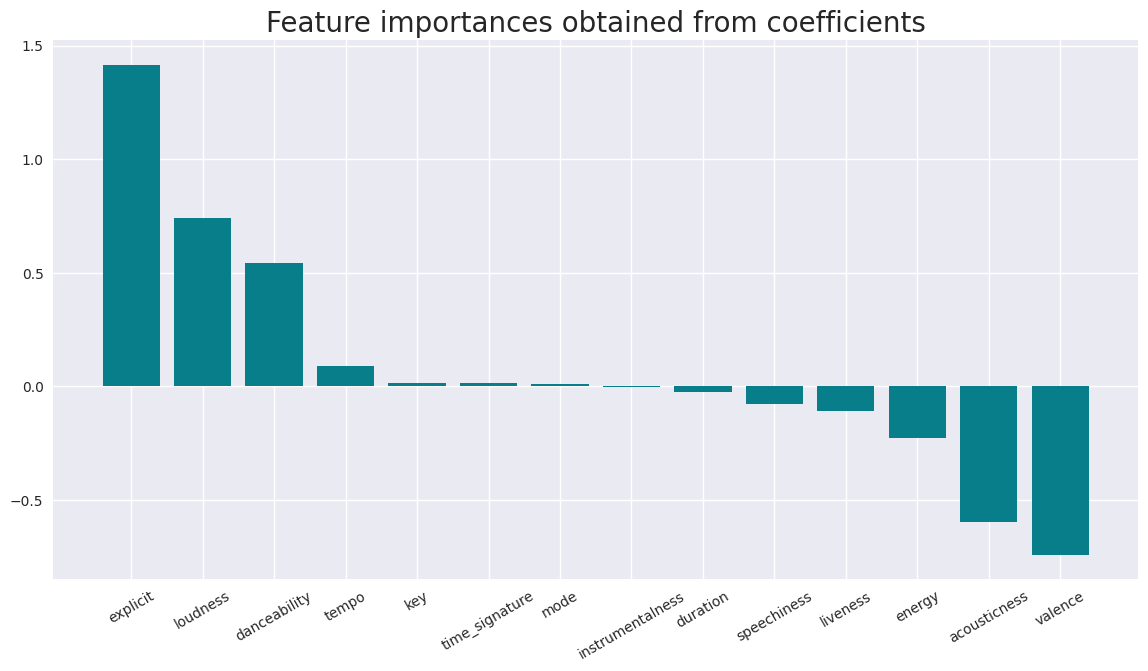

In [49]:
plt.figure(figsize = (14, 7))

plt.bar(x = importances['Attribute'], height = importances['Importance'], color = '#087E8B')
plt.title('Feature importances obtained from coefficients', size = 20)
plt.xticks(rotation = 30)
plt.show()

# Random Forest

In [50]:
classifier = Pipeline([
    ('preprocessing', preprocessing),
    ('random_forest', RandomForestClassifier(random_state = 42))
])

classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7ca5bdf6fc70>,
                                                                                       func=<function column_ratio at 0x7ca5bdf6f130>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('random_forest', RandomForestClassifier(random_state=42))])

In [51]:
classifier.named_steps['random_forest'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}




Training results:

Classification Report : 
               precision    recall  f1-score   support

           0     0.9999    0.9939    0.9968    408511
           1     0.9939    0.9999    0.9969    408511

    accuracy                         0.9969    817022
   macro avg     0.9969    0.9969    0.9969    817022
weighted avg     0.9969    0.9969    0.9969    817022


ROC AUC Score : 0.9968556538257234

Confusion Matrix: 
[[406001   2510]
 [    59 408452]]

Axes(0.125,0.11;0.281818x0.77)



test results: 

classification Report : 
               precision    recall  f1-score   support

           0     0.8984    0.9681    0.9319    102318
           1     0.5383    0.2538    0.3449     15017

    accuracy                         0.8766    117335
   macro avg     0.7183    0.6109    0.6384    117335
weighted avg     0.8523    0.8766    0.8568    117335


ROC AUC Score : 0.6109148188969824

Confusion Matrix:
 [[99049  3269]
 [11206  3811]]

Axes(0.547727,0.11;0.281818x0.77)





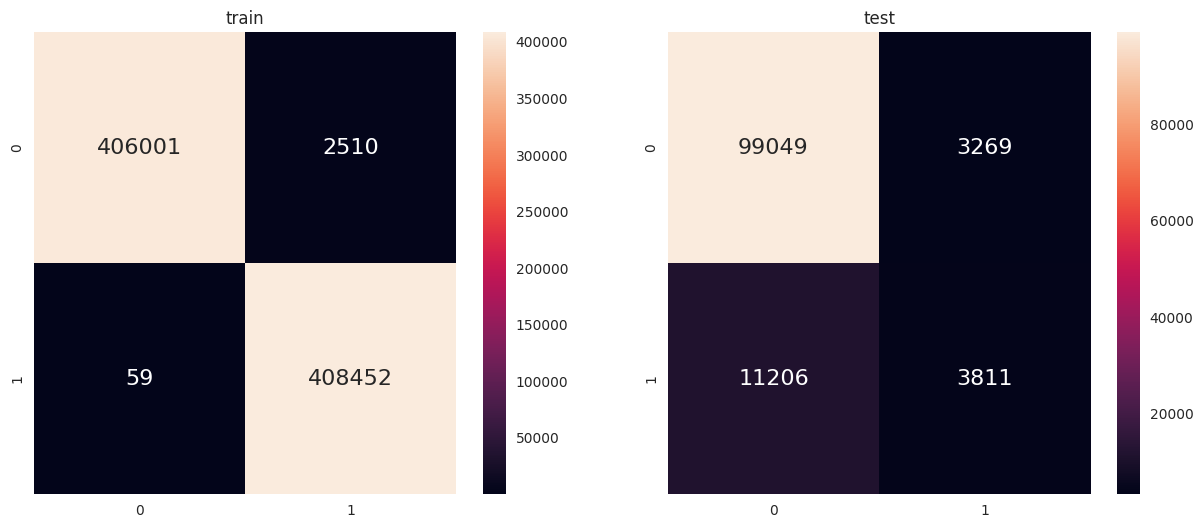

In [52]:
print_score(classifier, X_train, y_train, X_test, y_test)

In [53]:
classifier = Pipeline([
    ('preprocessing', preprocessing),
    ('random_forest', RandomForestClassifier(n_estimators = 30, max_features = 'sqrt', max_depth=50, min_samples_leaf = 3, min_samples_split = 2, criterion = 'entropy', bootstrap = True, random_state = 42))
])

classifier.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7ca5bdf6fc70>,
                                                                                       func=<function column_ratio at 0x7ca5bdf6f130>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('random_forest',
                 RandomForestClassifier(criterion='entropy', max_depth=50,
                                        min_samples_leaf=3, n_estimators=30,
                                        random_state=42))])




Training results:

Classification Report : 
               precision    recall  f1-score   support

           0     0.9993    0.9899    0.9946    408511
           1     0.9900    0.9993    0.9946    408511

    accuracy                         0.9946    817022
   macro avg     0.9946    0.9946    0.9946    817022
weighted avg     0.9946    0.9946    0.9946    817022


ROC AUC Score : 0.9945950047856728

Confusion Matrix: 
[[404377   4134]
 [   282 408229]]

Axes(0.125,0.11;0.281818x0.77)



test results: 

classification Report : 
               precision    recall  f1-score   support

           0     0.9064    0.9449    0.9253    102318
           1     0.4718    0.3354    0.3921     15017

    accuracy                         0.8669    117335
   macro avg     0.6891    0.6401    0.6587    117335
weighted avg     0.8508    0.8669    0.8570    117335


ROC AUC Score : 0.6401487958089336

Confusion Matrix:
 [[96678  5640]
 [ 9980  5037]]

Axes(0.547727,0.11;0.281818x0.77)





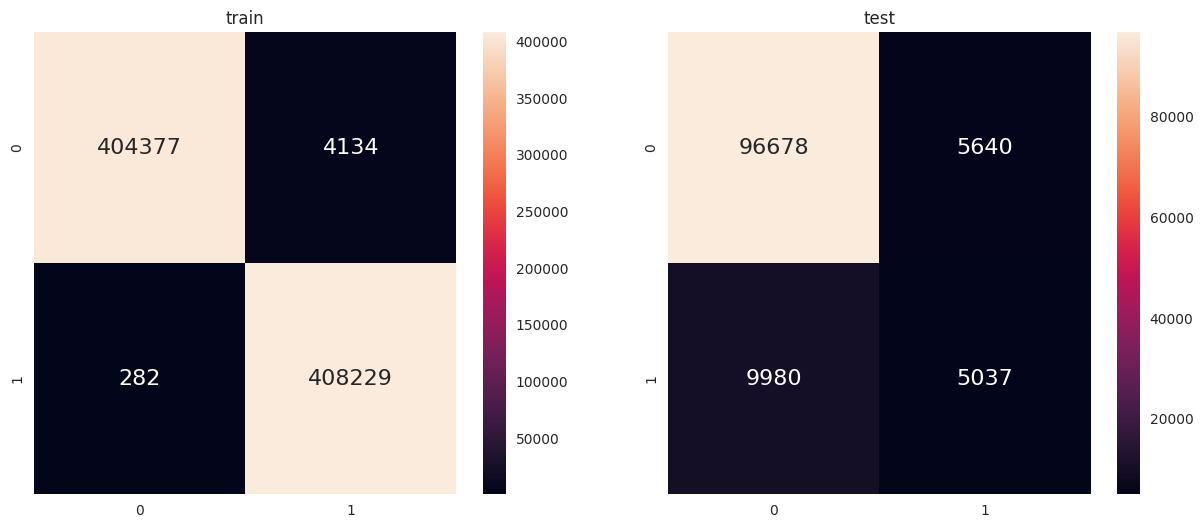

In [54]:
print_score(classifier, X_train, y_train, X_test, y_test)

In [55]:
classifier.named_steps['random_forest'].feature_importances_

array([0.09722545, 0.02942878, 0.08707732, 0.08705201, 0.0402225 ,
       0.13531289, 0.00967237, 0.08703018, 0.11231771, 0.06166287,
       0.07928699, 0.08978319, 0.07814586, 0.00578189])

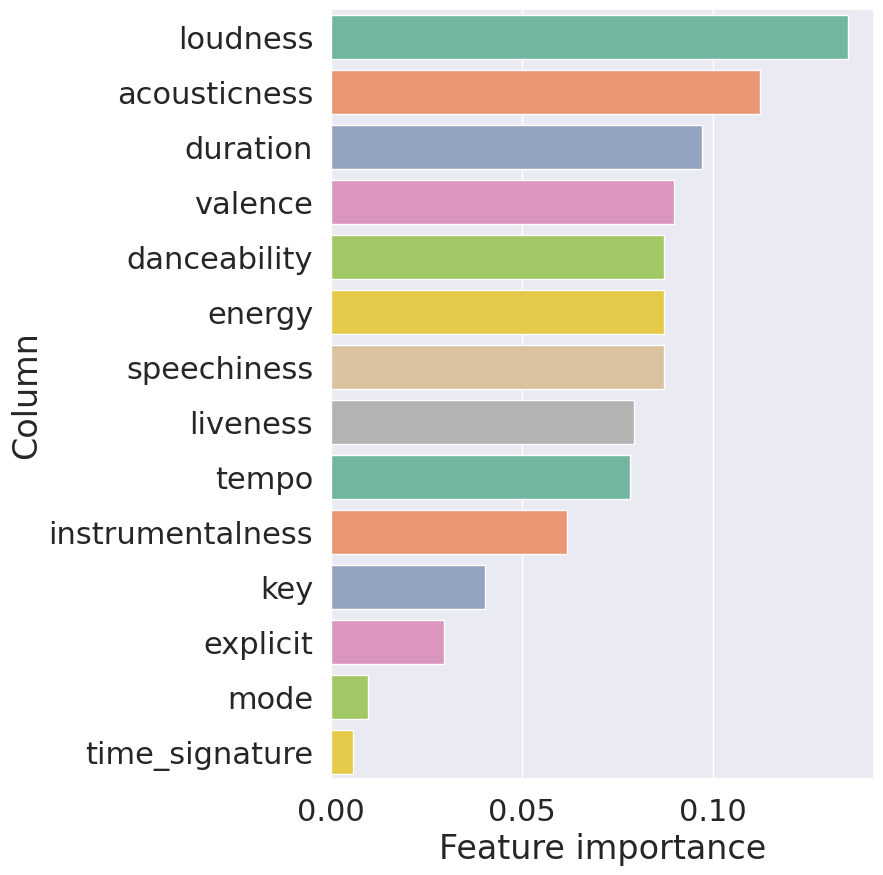

In [56]:
features_importance = pd.DataFrame(
    {
        'Column': features_names,
        'Feature importance': classifier.named_steps['random_forest'].feature_importances_
    }
).sort_values('Feature importance', ascending = False)

sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize = (7, 10))
ax = sns.barplot(x = 'Feature importance', y = 'Column', data = features_importance, palette = 'Set2', orient = 'h')

# XGBoost

In [57]:
classifier = Pipeline([
    ('preprocessing', preprocessing),
    ('xgboost', XGBClassifier())
])

classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7ca5bdf6fc70>,
                                                                                       func=<function column_ratio at 0x7ca5bdf6f130>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [58]:
classifier.named_steps['xgboost'].get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}




Training results:

Classification Report : 
               precision    recall  f1-score   support

           0     0.7681    0.7204    0.7435    408511
           1     0.7367    0.7825    0.7589    408511

    accuracy                         0.7514    817022
   macro avg     0.7524    0.7514    0.7512    817022
weighted avg     0.7524    0.7514    0.7512    817022


ROC AUC Score : 0.7514473294476771

Confusion Matrix: 
[[294293 114218]
 [ 88855 319656]]

Axes(0.125,0.11;0.281818x0.77)



test results: 

classification Report : 
               precision    recall  f1-score   support

           0     0.9467    0.7115    0.8124    102318
           1     0.2700    0.7271    0.3938     15017

    accuracy                         0.7135    117335
   macro avg     0.6084    0.7193    0.6031    117335
weighted avg     0.8601    0.7135    0.7589    117335


ROC AUC Score : 0.7193131556397383

Confusion Matrix:
 [[72801 29517]
 [ 4098 10919]]

Axes(0.547727,0.11;0.281818x0.77)





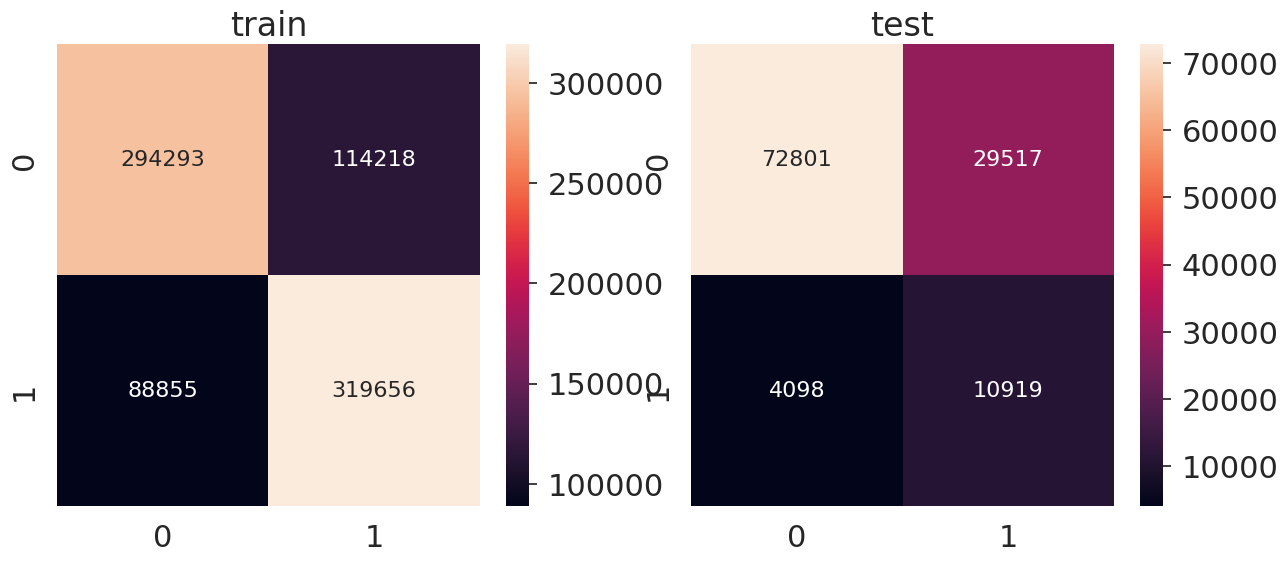

In [59]:
print_score(classifier, X_train, y_train, X_test, y_test)

In [60]:
classifier = Pipeline([
    ('preprocessing', preprocessing),
    ('xgboost', XGBClassifier(
                    n_estimators = 100,
                    gamma = 0.5,
                    max_depth = 6,
                    learning_rate = 0.1,
                    min_child_weight = 1,
                    subsample = 1,
                    colsample_bytree = 1,
                    objective = 'binary:logistic',
                    random_state = 42
                )
    )
])

classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7ca5bdf6fc70>,
                                                                                       func=<function column_ratio at 0x7ca5bdf6f130>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                               feature_types=None, gamma=0.5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])




Training results:

Classification Report : 
               precision    recall  f1-score   support

           0     0.7418    0.7034    0.7221    408511
           1     0.7180    0.7552    0.7361    408511

    accuracy                         0.7293    817022
   macro avg     0.7299    0.7293    0.7291    817022
weighted avg     0.7299    0.7293    0.7291    817022


ROC AUC Score : 0.7293157344600267

Confusion Matrix: 
[[287353 121158]
 [ 99997 308514]]

Axes(0.125,0.11;0.281818x0.77)



test results: 

classification Report : 
               precision    recall  f1-score   support

           0     0.9479    0.6985    0.8043    102318
           1     0.2644    0.7386    0.3895     15017

    accuracy                         0.7036    117335
   macro avg     0.6062    0.7185    0.5969    117335
weighted avg     0.8605    0.7036    0.7512    117335


ROC AUC Score : 0.718544628616481

Confusion Matrix:
 [[71465 30853]
 [ 3925 11092]]

Axes(0.547727,0.11;0.281818x0.77)





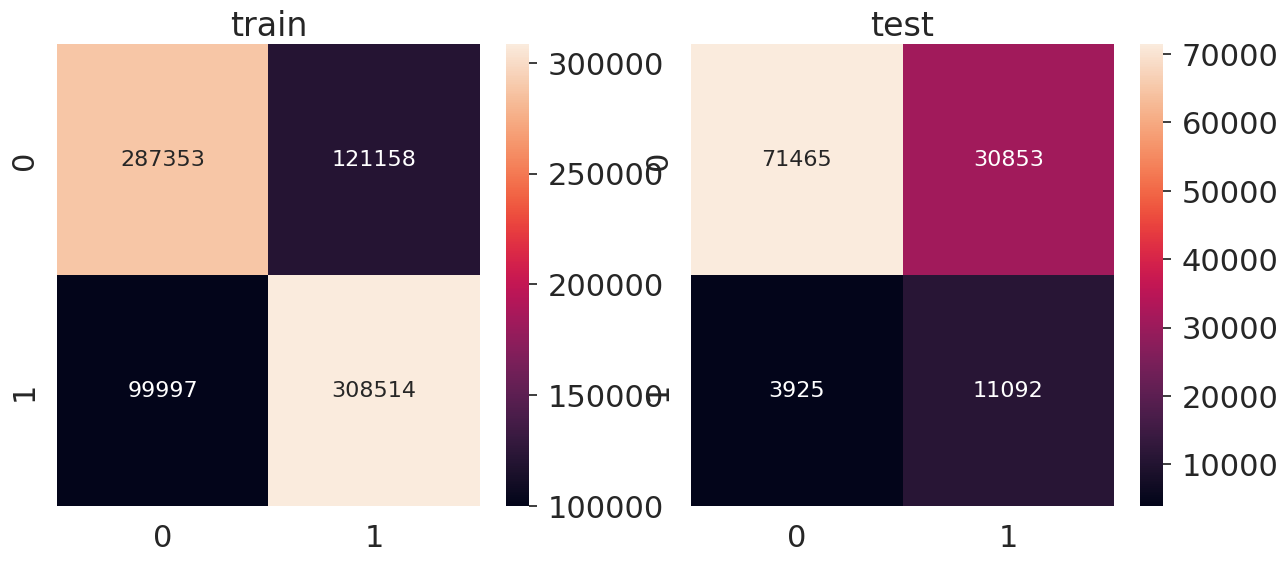

In [61]:
print_score(classifier, X_train, y_train, X_test, y_test)

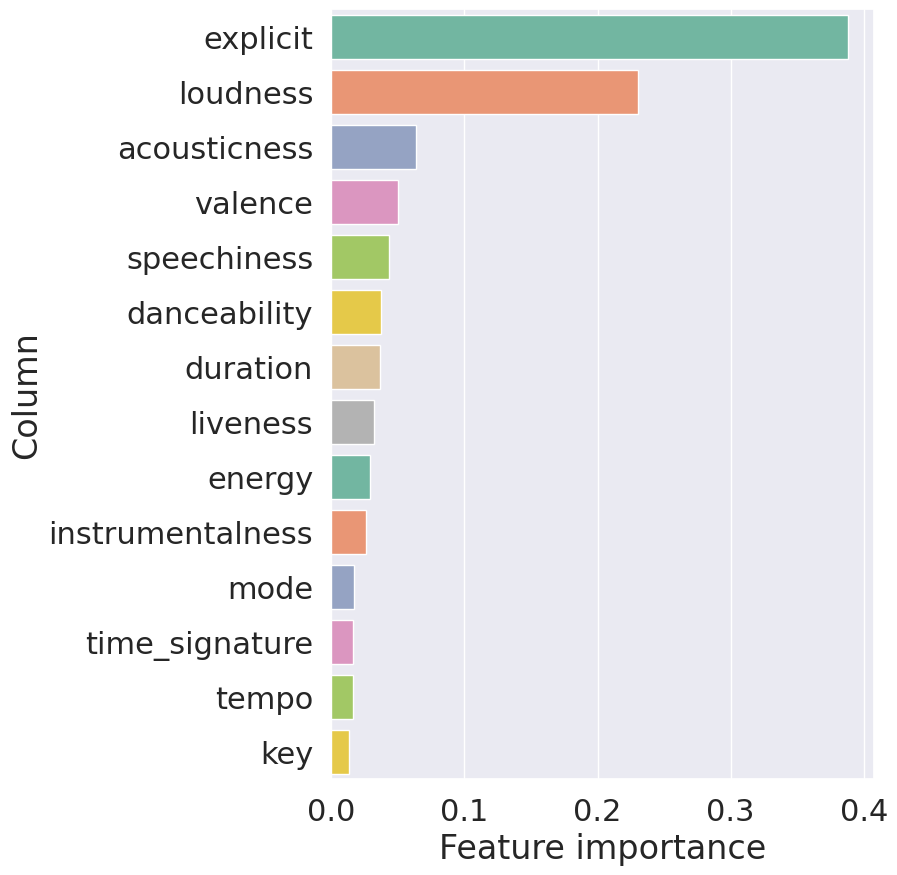

In [62]:
features_importance = pd.DataFrame(
    {
        'Column': features_names,
        'Feature importance': classifier.named_steps["xgboost"].feature_importances_
    }
).sort_values('Feature importance', ascending = False)

sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize = (7, 10))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h')

# Reference
https://www.kaggle.com/code/vhtrieu/spotify-track-popularity-analysis-and-prediction